In [1]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021




import sys


sys.path.append("/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/")
sys.path.insert(1, '/home/nenciric/Documents/git/charged_molecules_binding/simulations_list/')

import numpy as np
from scipy import optimize
import relaxation_times as rt
import matplotlib.pyplot as plt
import MDAnalysis as mda
import os
import re
import yaml
import gc
import math
import warnings

import AnalysisToolbox as AT

from datetime import date
today = date.today()

import fnmatch
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;






folder_path="/media/nenciric/7686706b-e3c8-4ac3-a074-769f122a69d6/CoryPeptides/mahti/GWALP_dimers/"
systems=["Gwalp"]



/home/nenciric/anaconda3/envs/all3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [93]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 

folder_path="/home/nenciric/Documents/git/CorysPeptides/relaxation_times_micelles_replicas/6_Gwalp_Dimer_70SDS_micelle_37C_CHARMM_OPC_mahti_0_3645_N_HN/"
output_path="/home/nenciric/Documents/git/CorysPeptides/relaxation_times_micelles_replicas/"
output_name="GWALP_dim_70SDS_850MHz"
#output_name=output_path+output_name
author_name="Ricky Nencini"
yaml_output=output_path+output_name+".yaml"

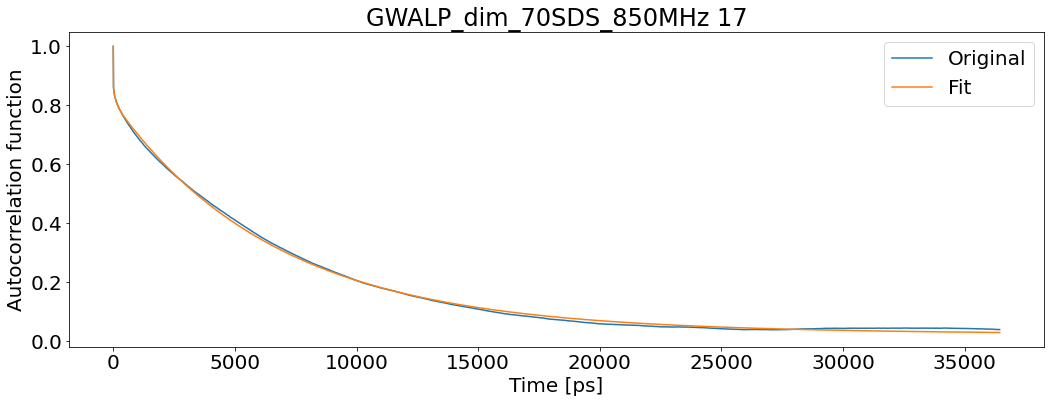

T1: 0.9659074319294462 T2: 0.06363476320554962 NOE: 0.7353663219703057


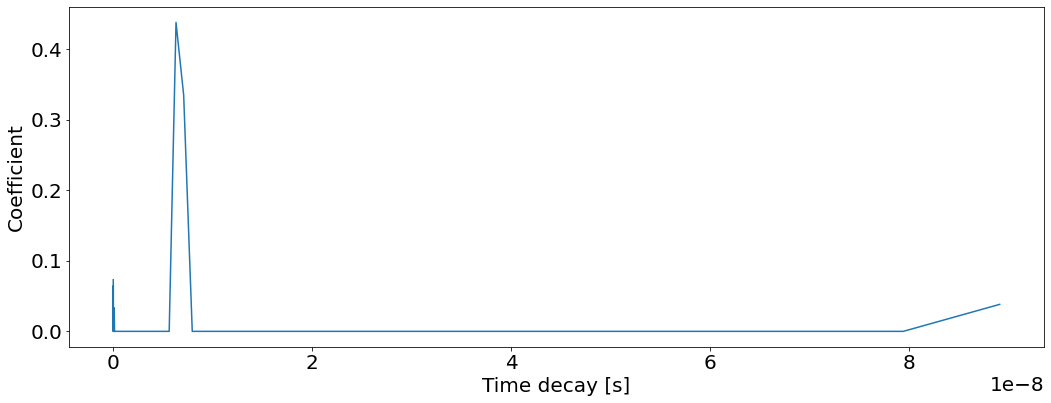

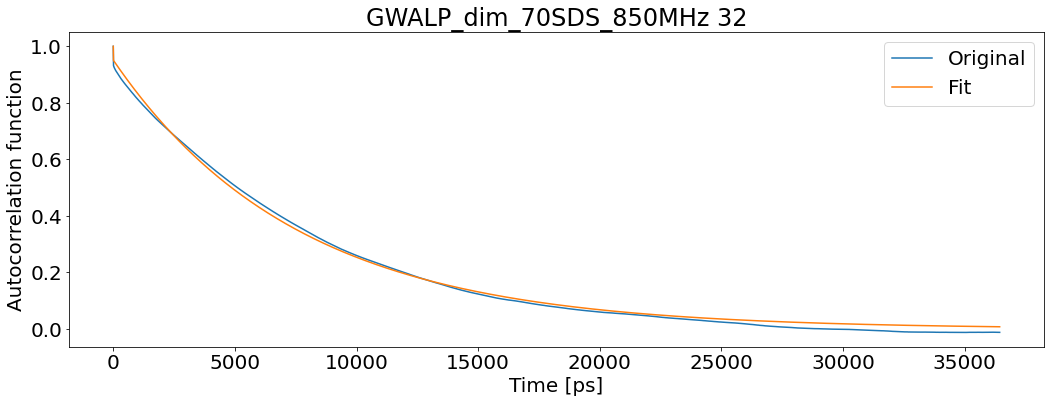

T1: 0.9114533204700878 T2: 0.07484447204308382 NOE: 0.8538382573198201


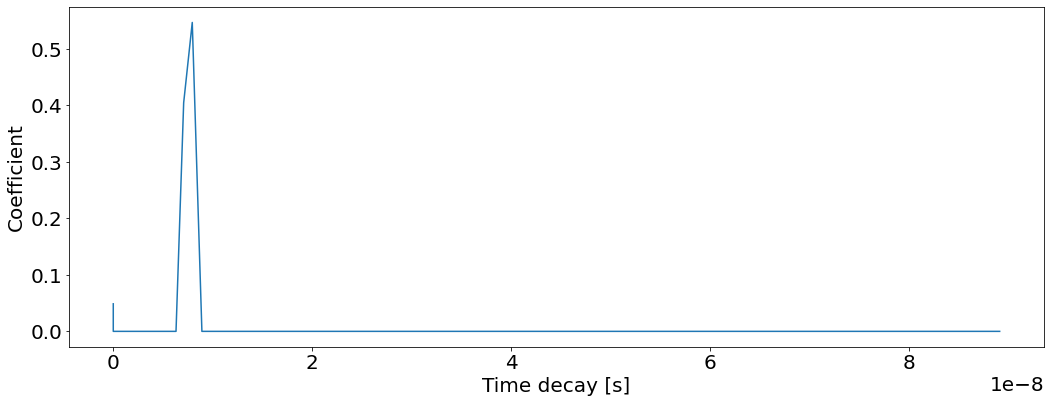

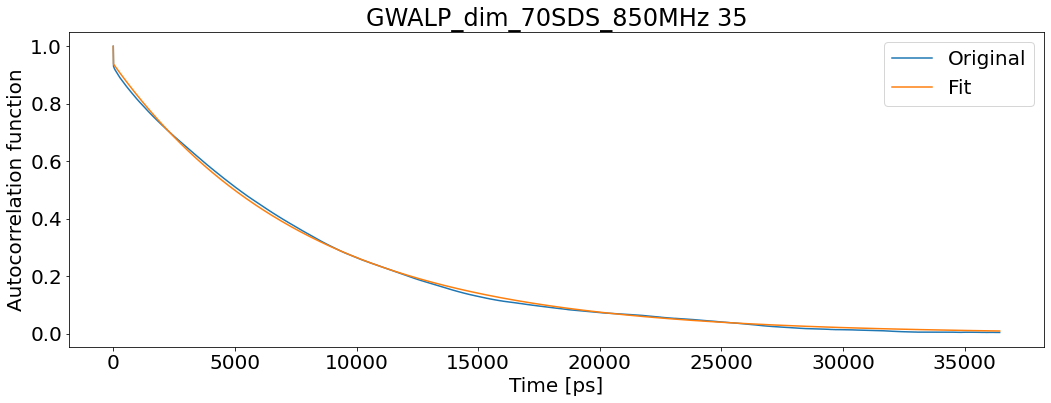

T1: 0.9607603333407952 T2: 0.07287870176005536 NOE: 0.8542145414340502


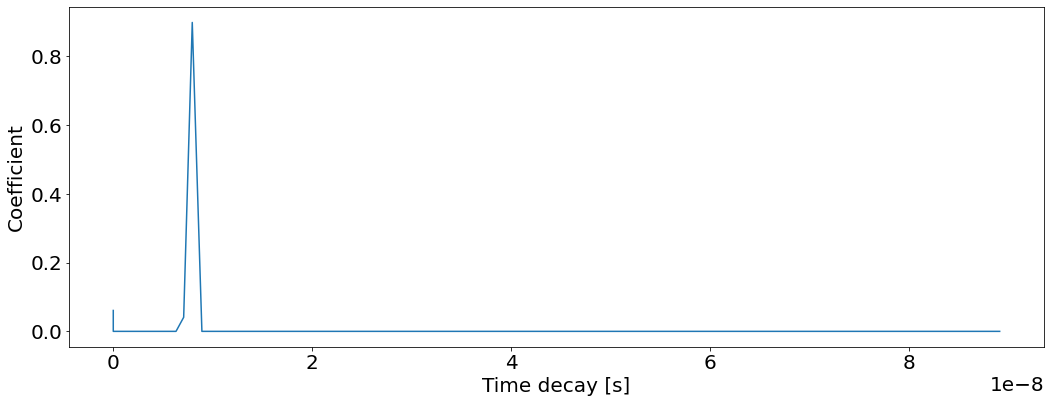

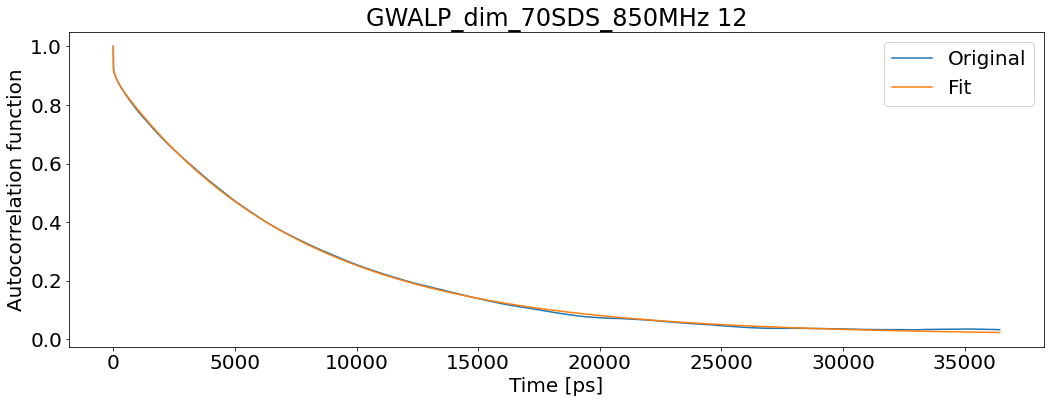

T1: 0.9714852225095603 T2: 0.06219799791719634 NOE: 0.7803104985157128


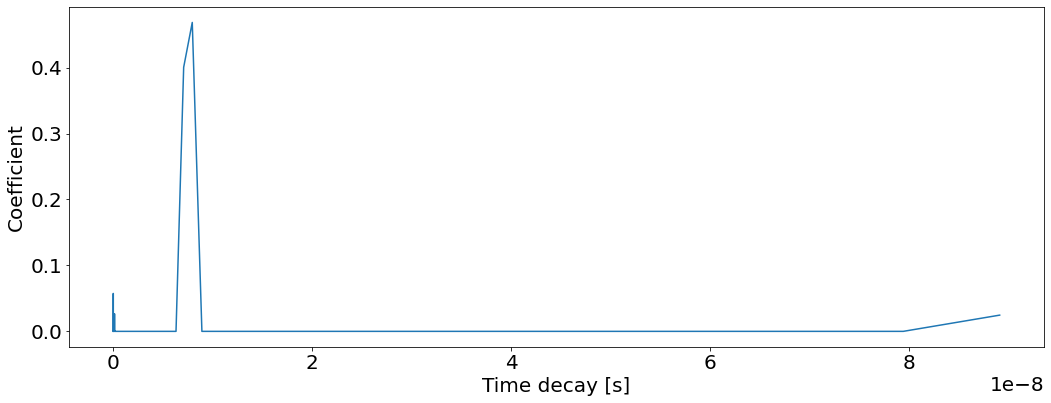

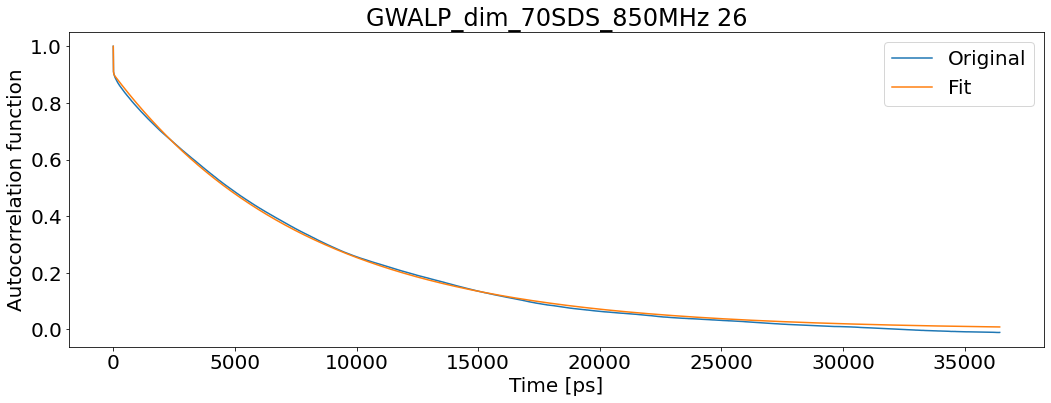

T1: 0.9968435810772127 T2: 0.07590243496415398 NOE: 0.8473156448855949


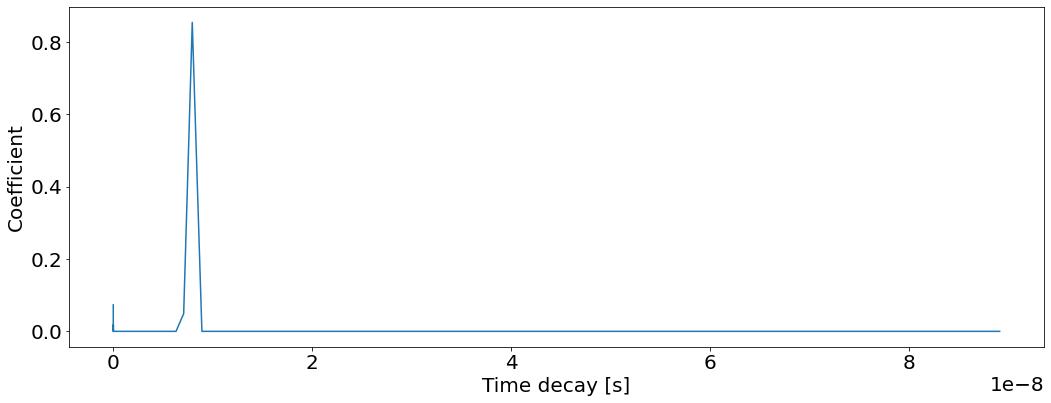

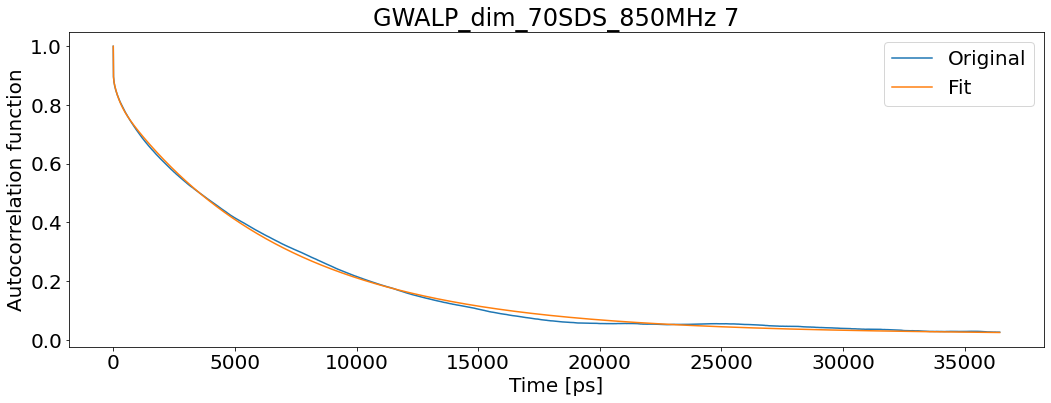

T1: 0.9364201994906188 T2: 0.06545598605197535 NOE: 0.6693056374104462


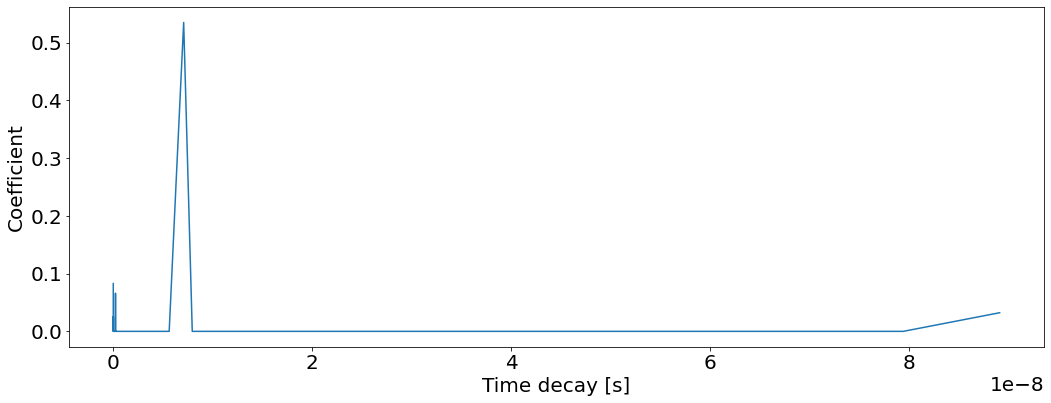

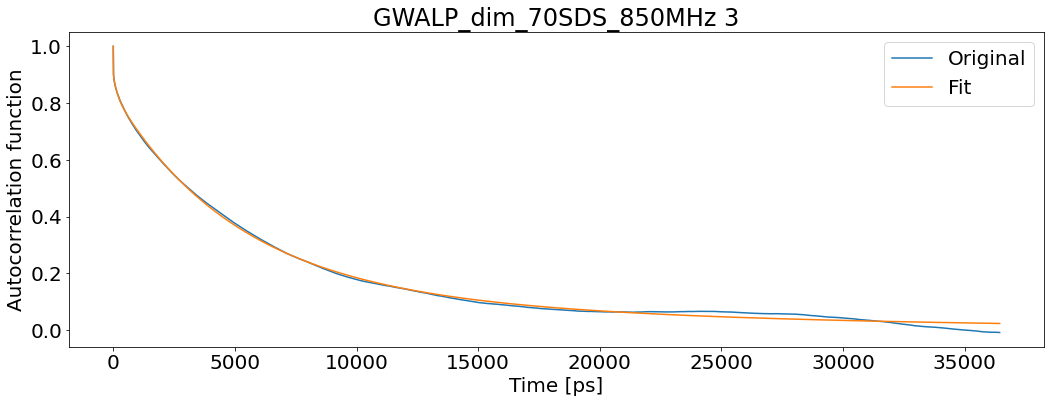

T1: 0.8093110673579623 T2: 0.0837648749507197 NOE: 0.7003416044879636


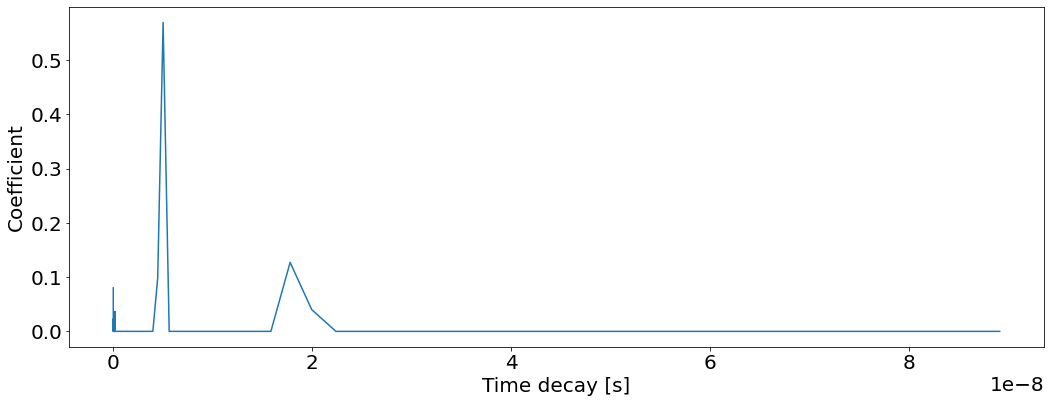

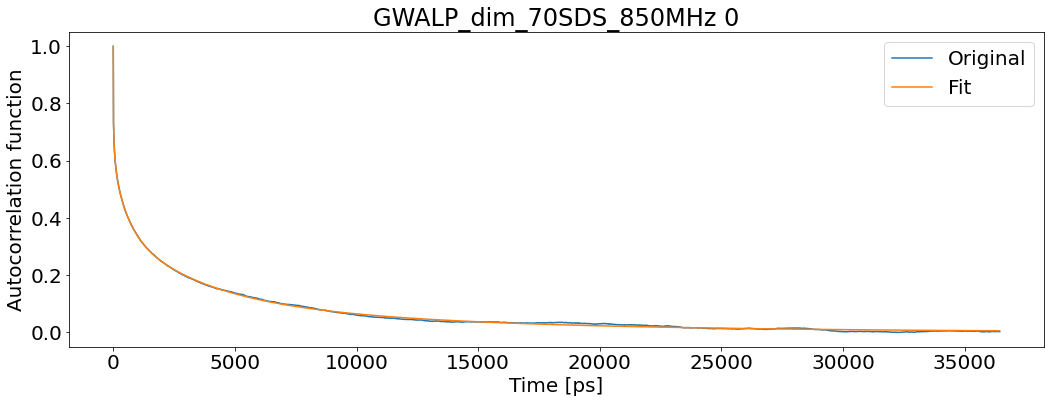

T1: 0.9434582062608932 T2: 0.20865956037352104 NOE: 0.24750982659658072


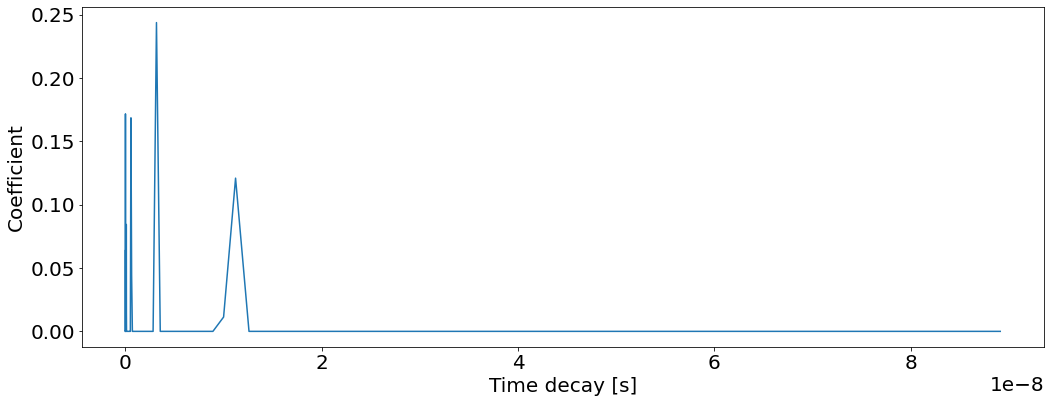

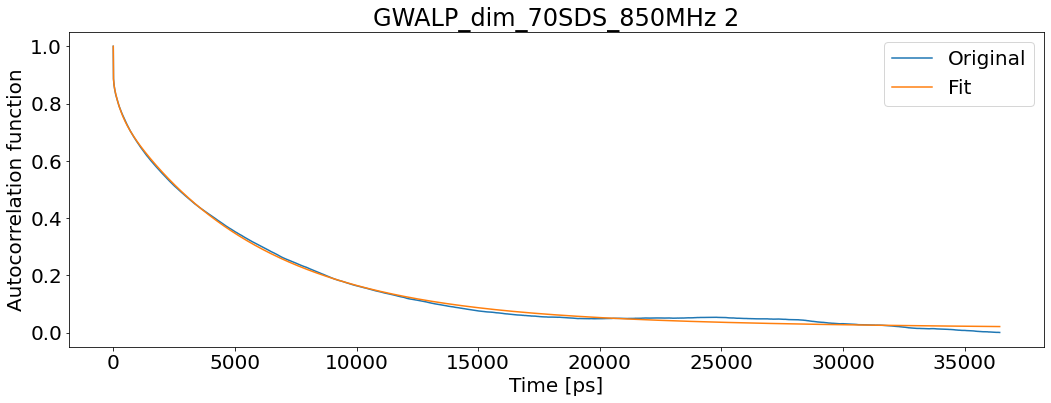

T1: 0.8347516052550547 T2: 0.08716096409081138 NOE: 0.631297827016982


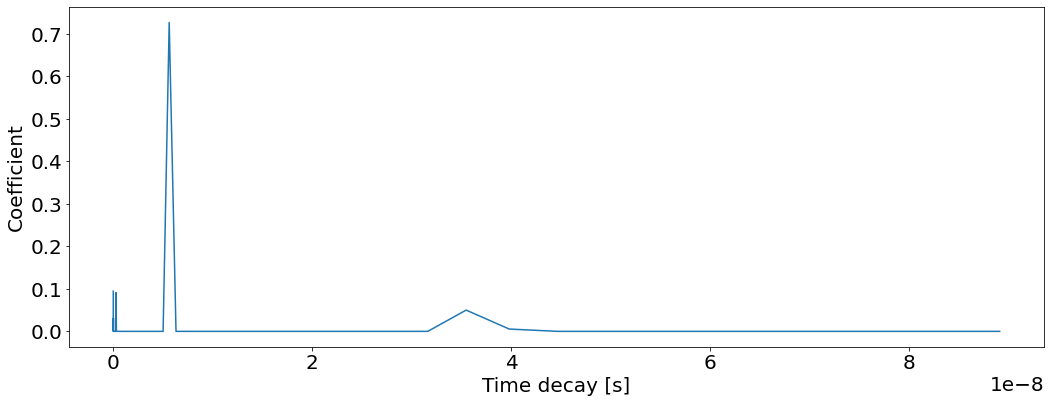

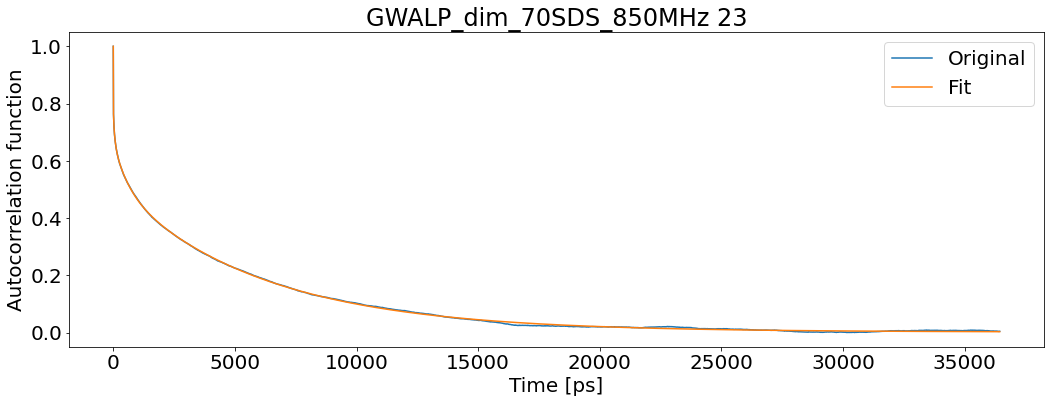

T1: 0.9848887050013717 T2: 0.15151492437050032 NOE: 0.4400369305281011


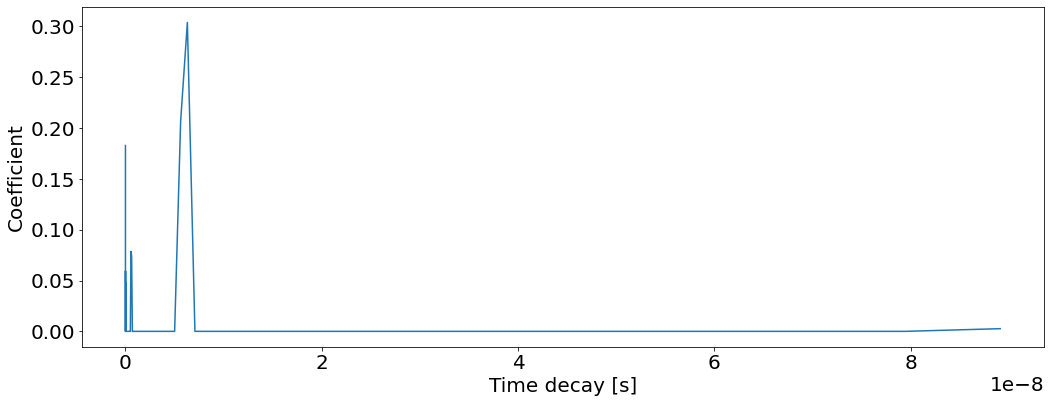

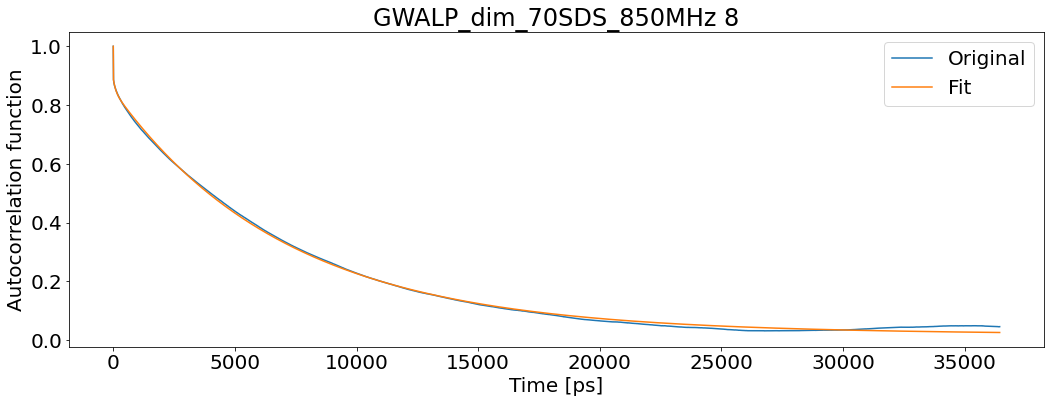

T1: 0.9711805043408701 T2: 0.06329607414906745 NOE: 0.7609474840060162


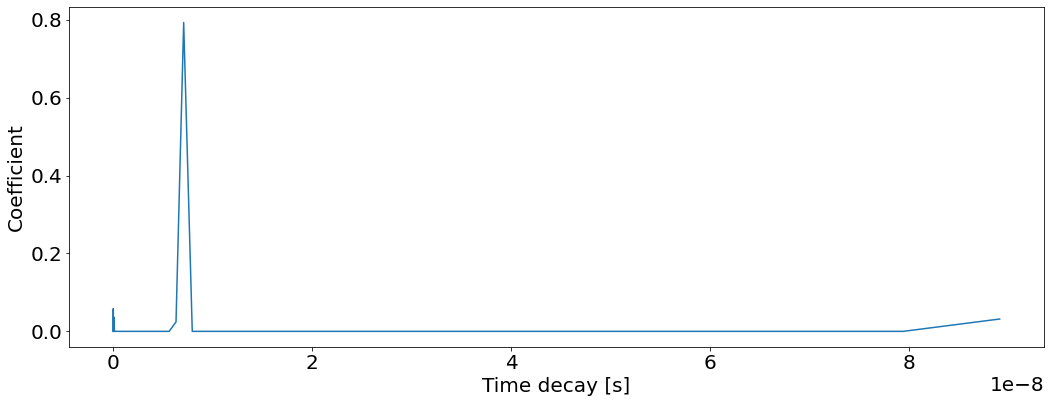

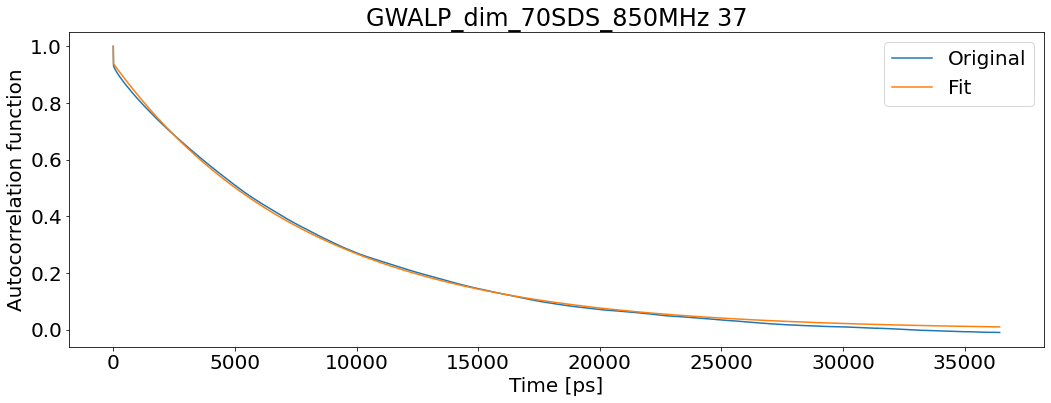

T1: 0.9680822120361438 T2: 0.07228533113106009 NOE: 0.8543383861701445


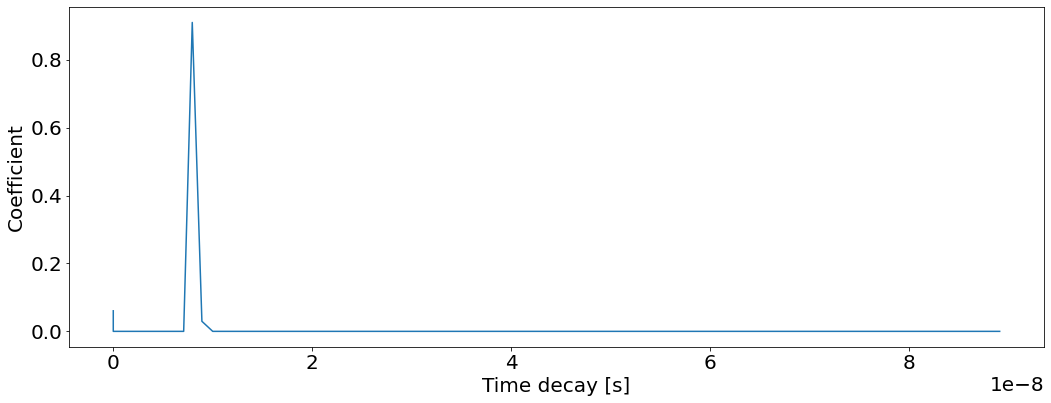

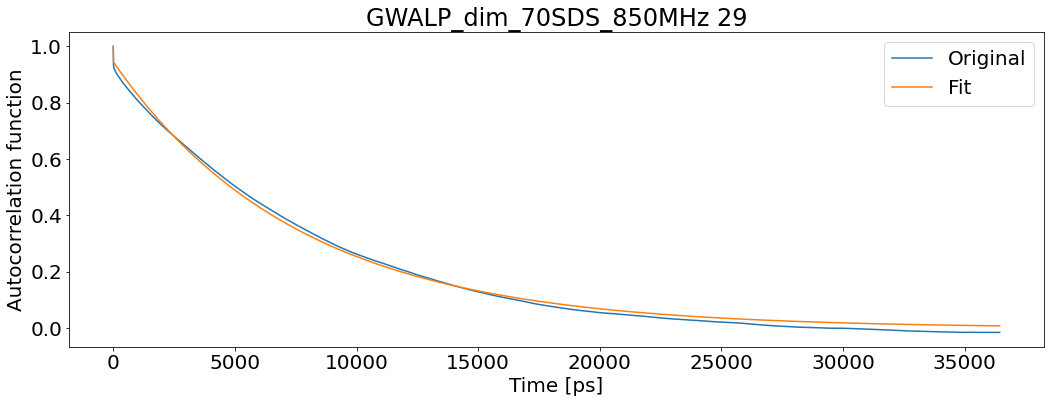

T1: 0.923029843300907 T2: 0.07492170695234919 NOE: 0.8537699083206693


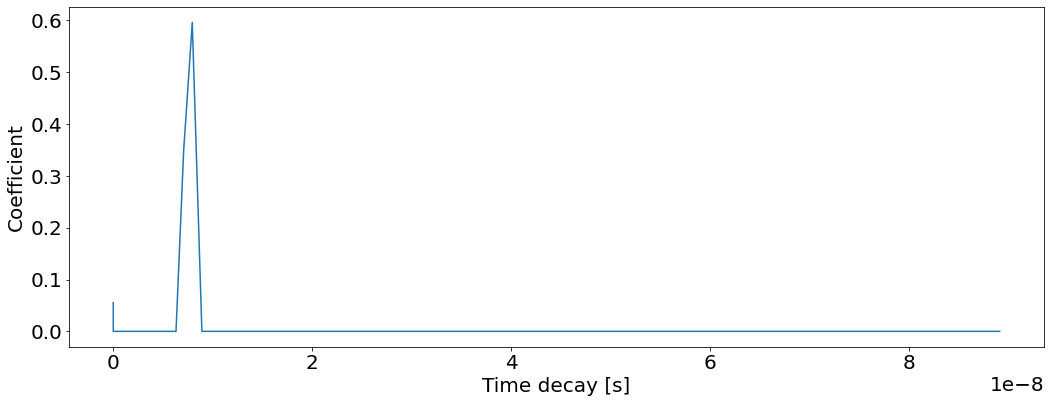

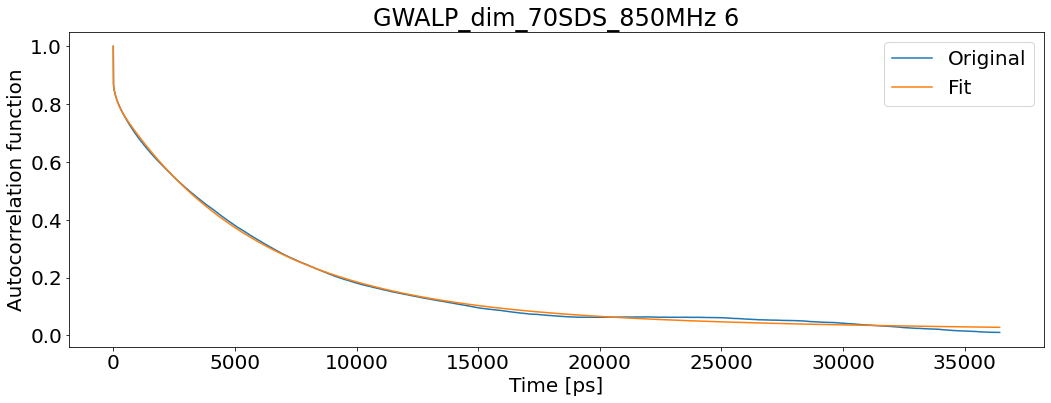

T1: 0.871210952719208 T2: 0.07837604562590687 NOE: 0.730157493226657


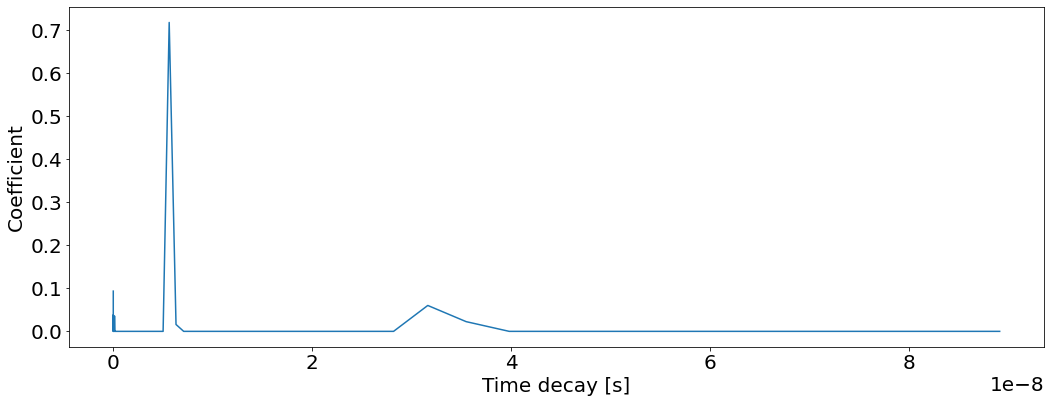

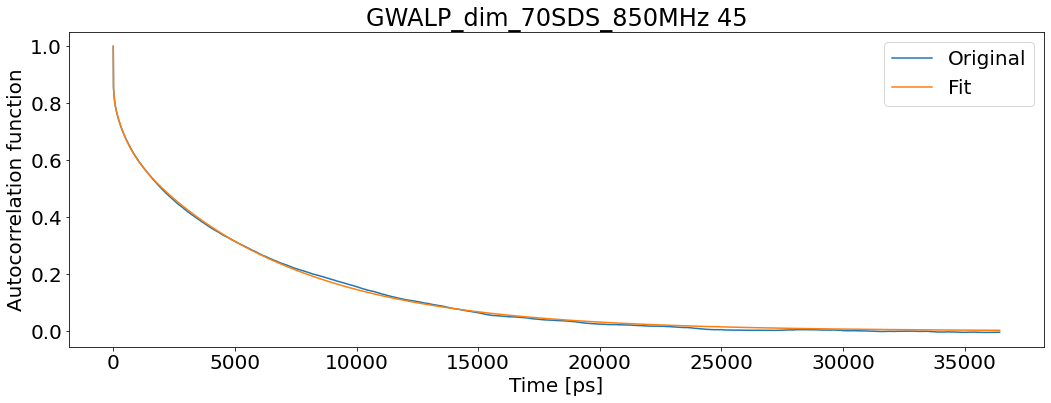

T1: 0.8990720265655611 T2: 0.11693819212494755 NOE: 0.5593056165270112


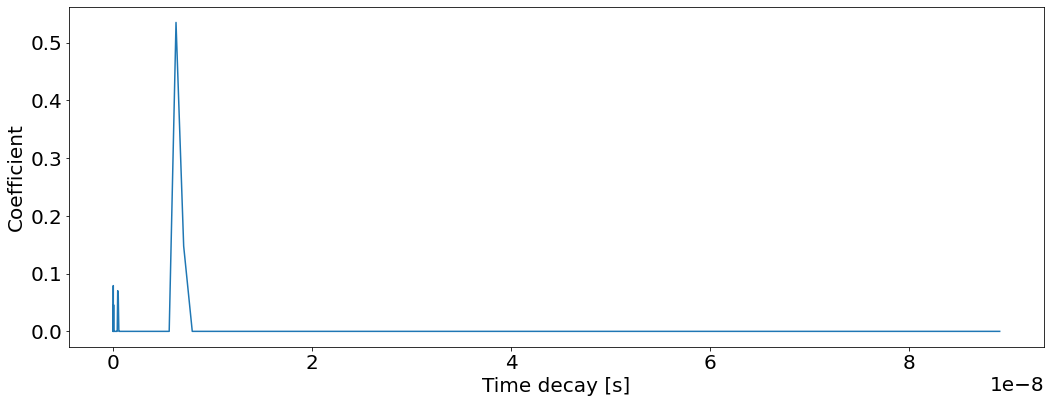

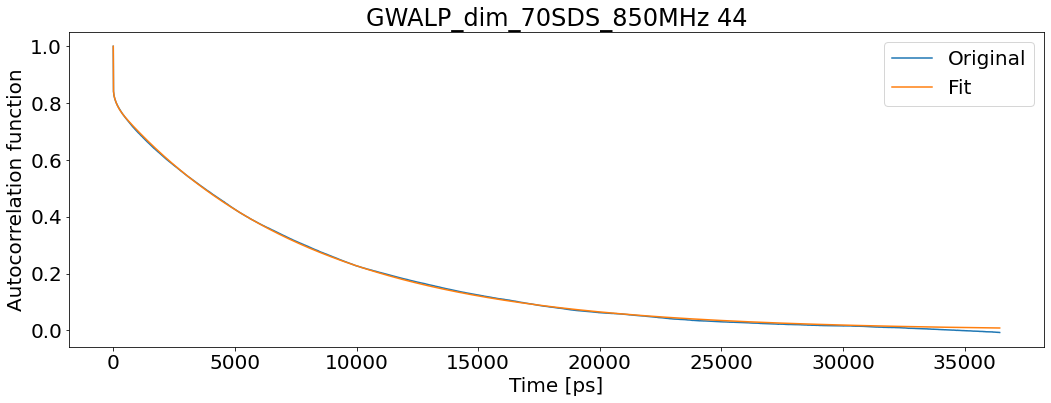

T1: 1.1018939263905518 T2: 0.08503429689136326 NOE: 0.732781819316011


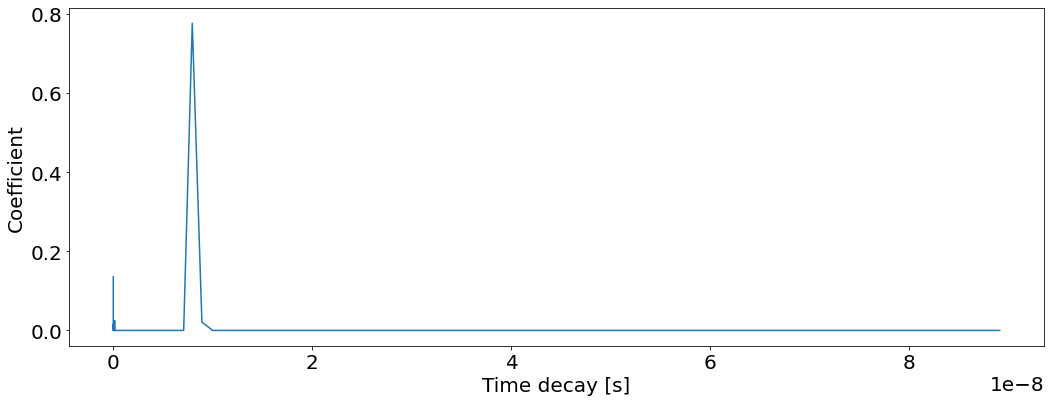

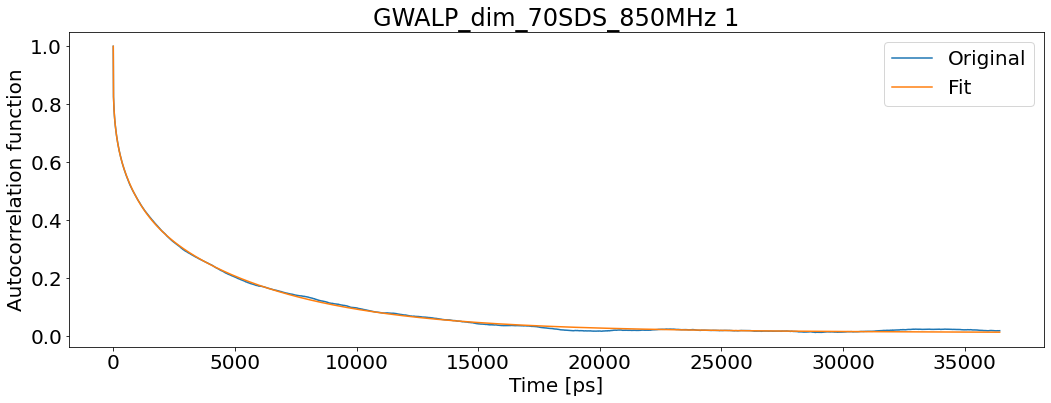

T1: 0.8245487178091152 T2: 0.1177180378099142 NOE: 0.4054960665583258


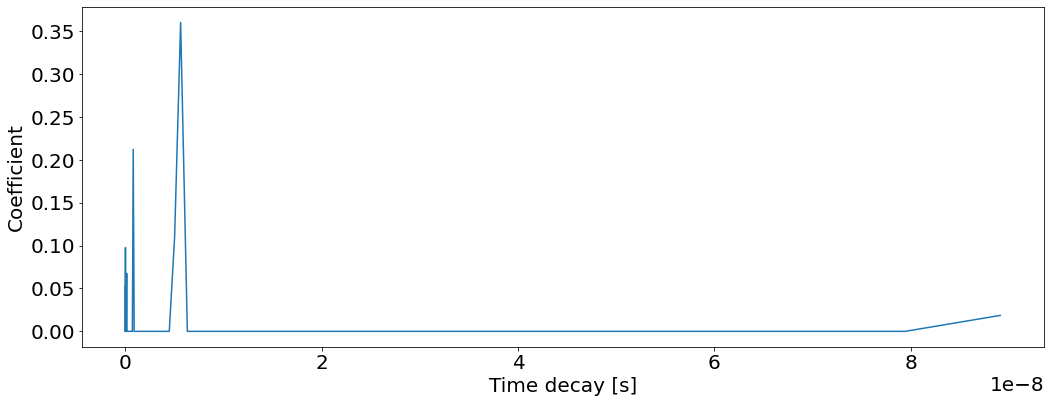

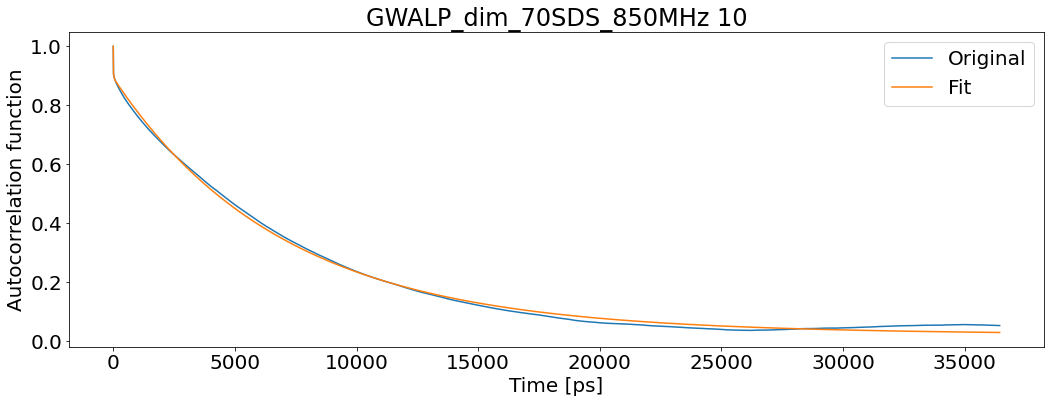

T1: 0.9287116547060621 T2: 0.0586739881325163 NOE: 0.8369891968753832


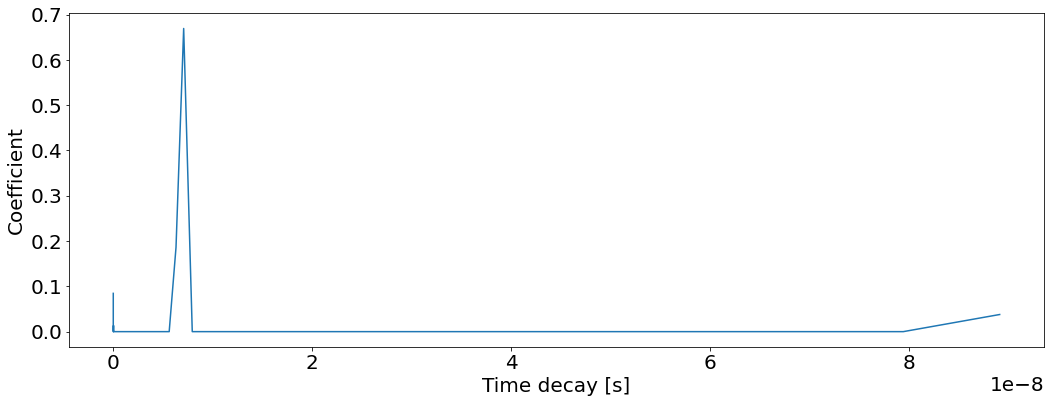

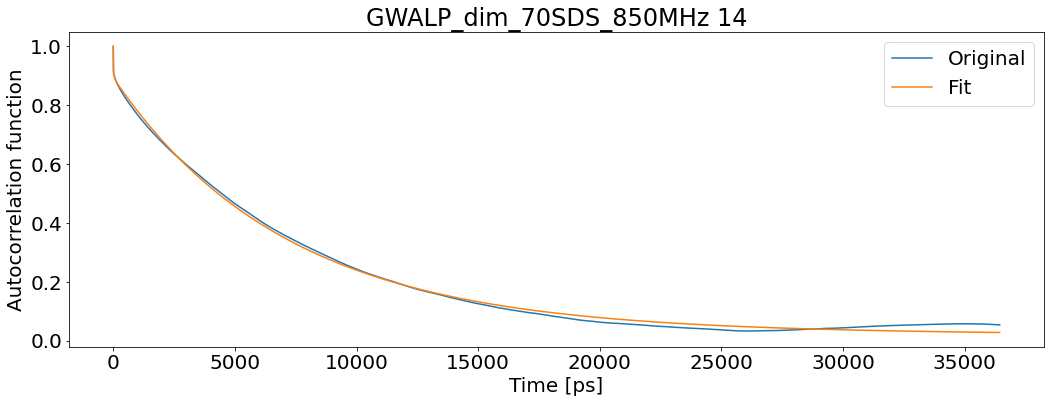

T1: 0.9425165331000552 T2: 0.05943565145424986 NOE: 0.82477288380848


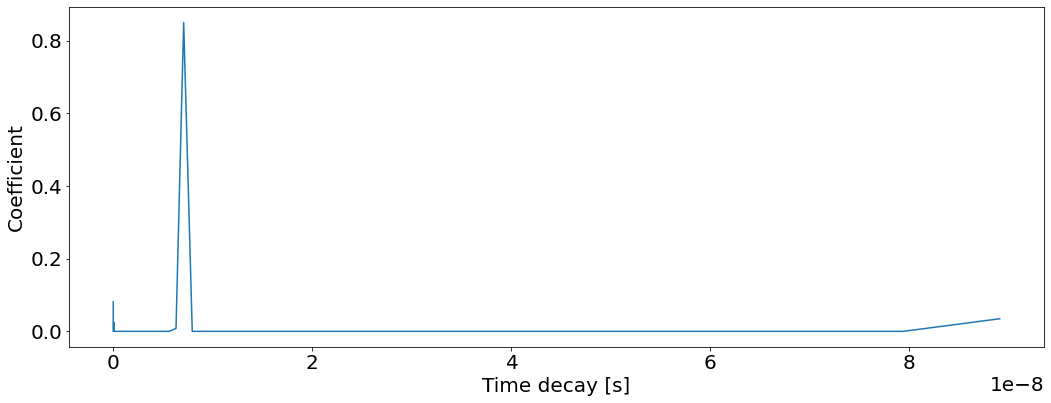

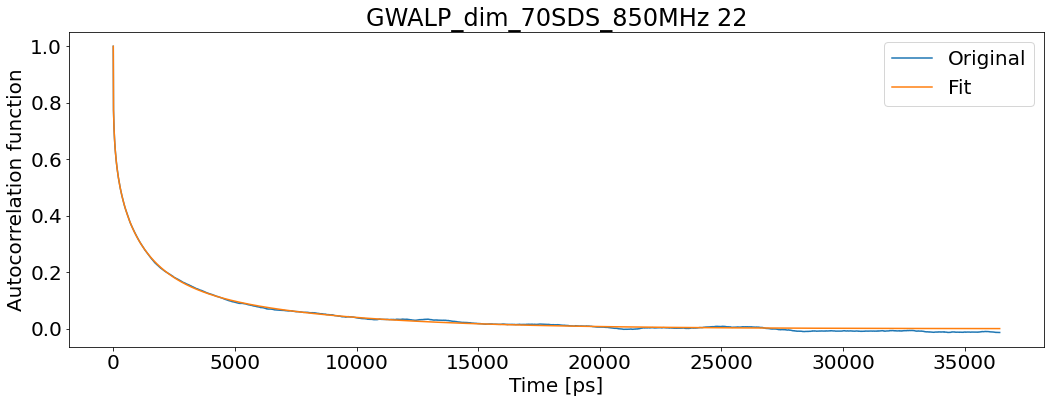

T1: 0.8052957884061611 T2: 0.2705851171738042 NOE: 0.23300485666789794


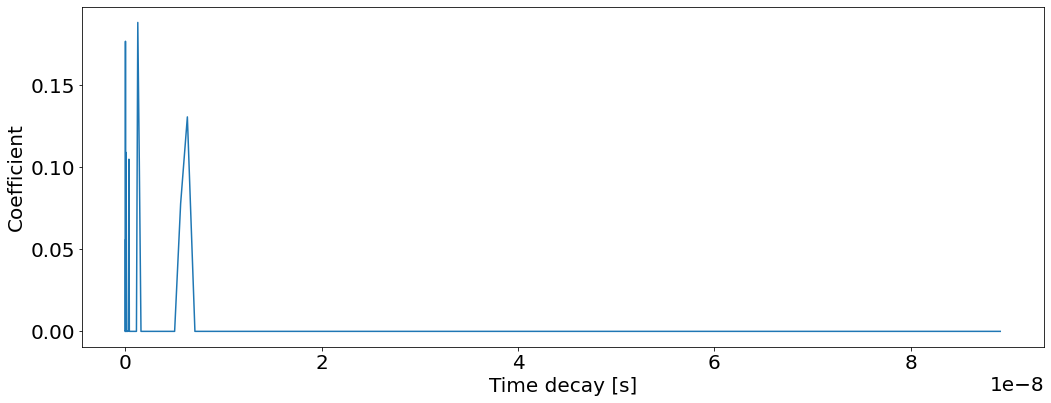

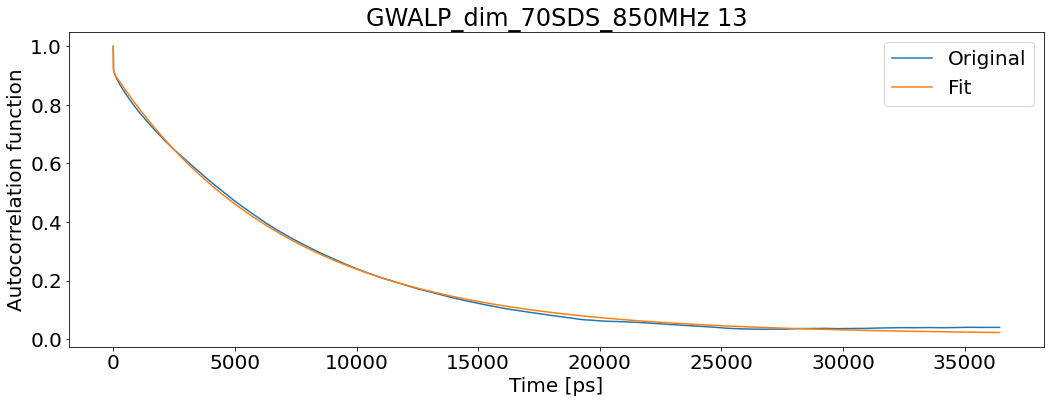

T1: 0.9201725824856049 T2: 0.06300390281583428 NOE: 0.8405823110690525


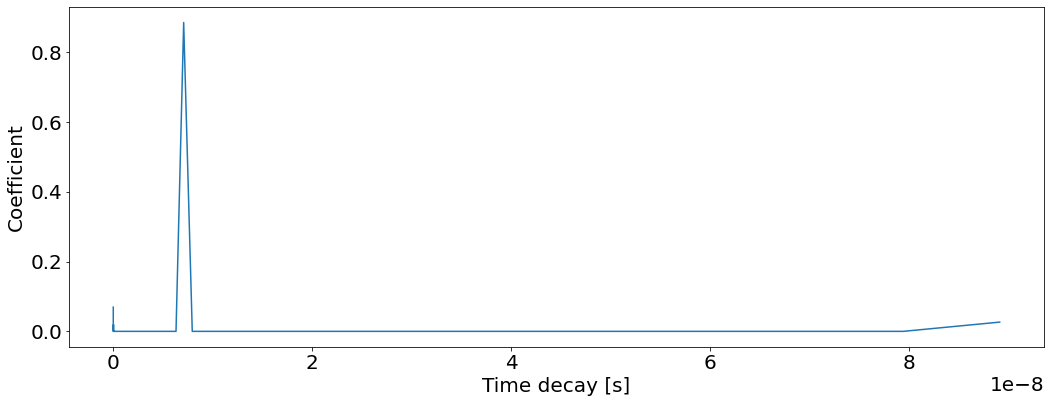

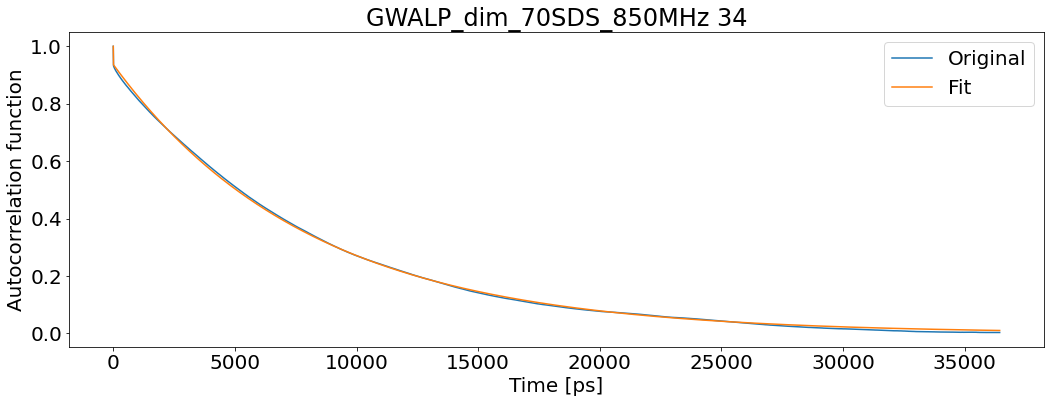

T1: 0.9807336757136083 T2: 0.07169853648486388 NOE: 0.8543781338301719


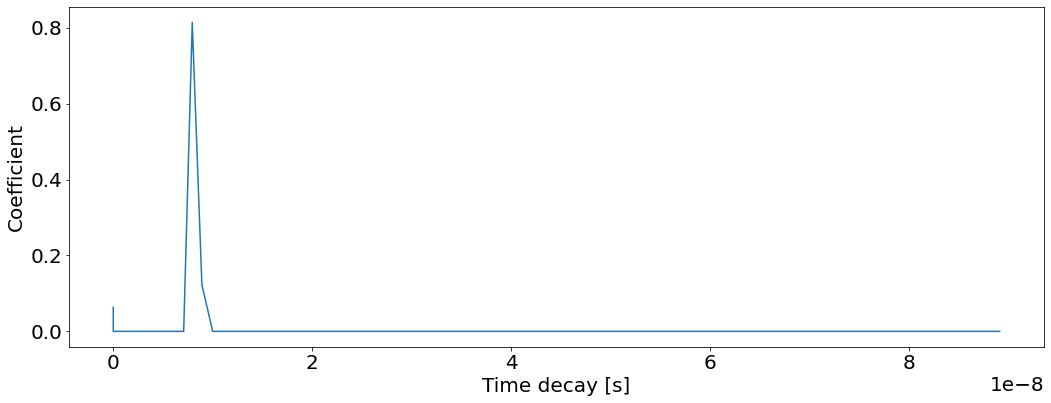

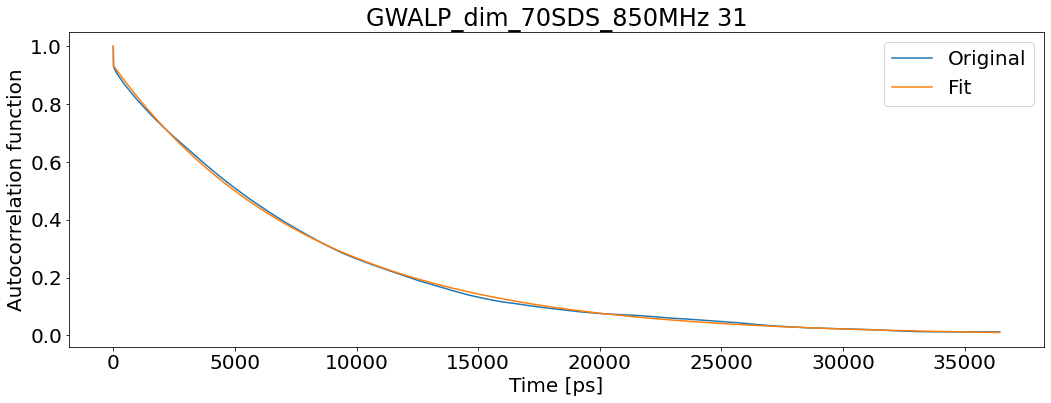

T1: 0.9762096270685714 T2: 0.07251207961170816 NOE: 0.8542156770050431


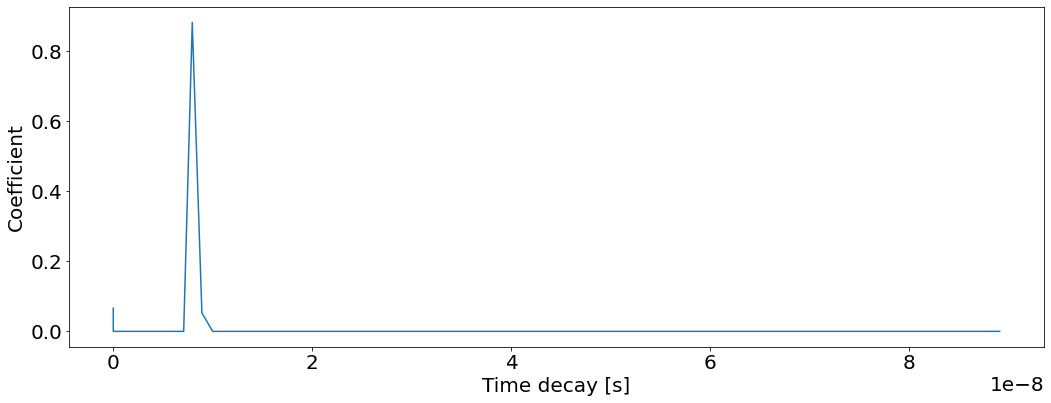

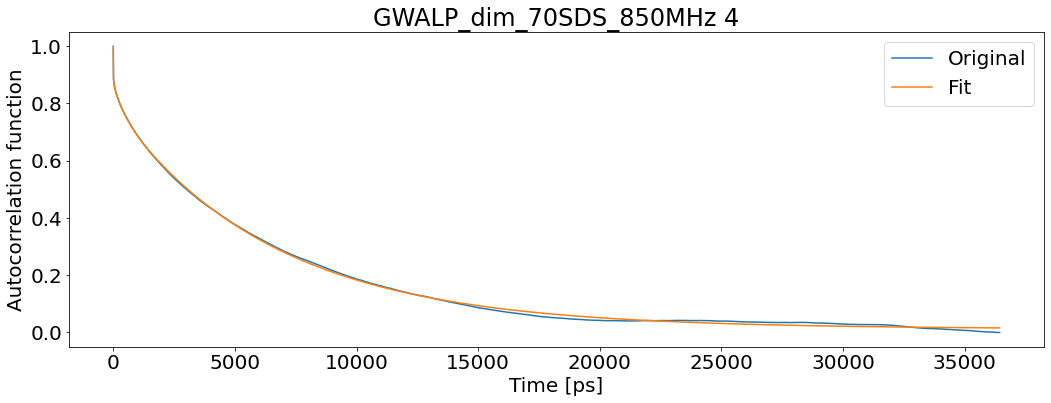

T1: 0.8849376483153092 T2: 0.08052852851685834 NOE: 0.6722484691257878


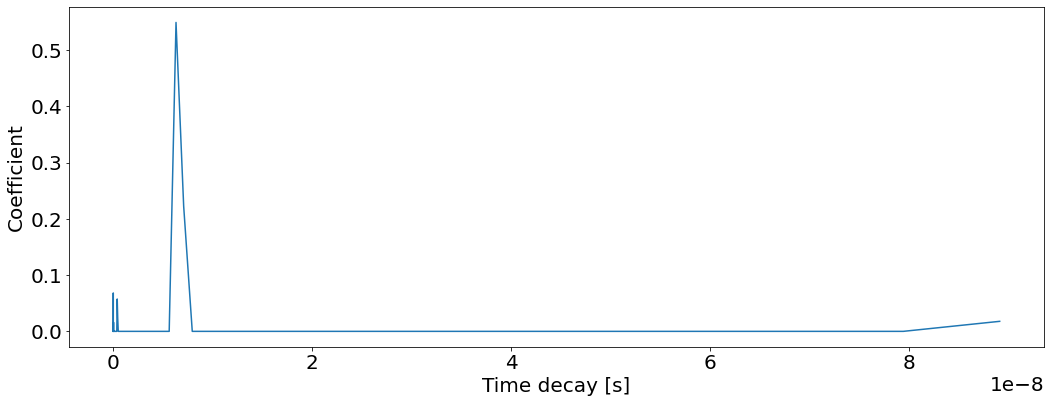

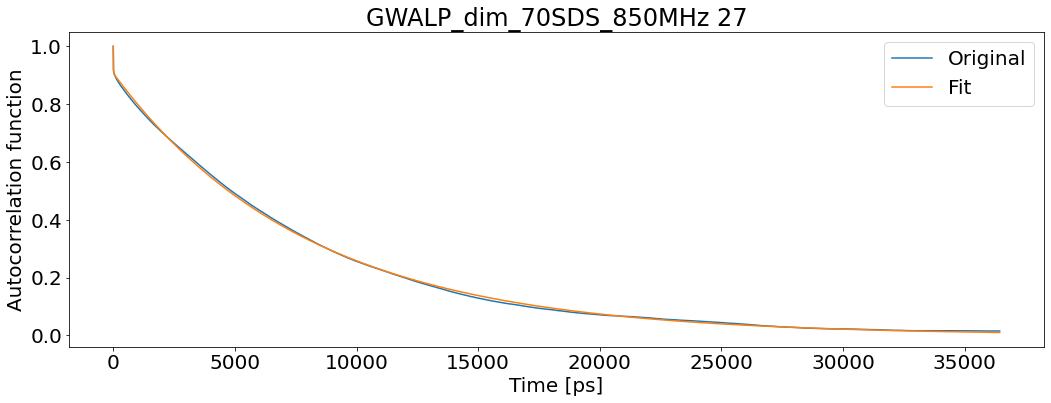

T1: 0.9980120975744841 T2: 0.07390359882351978 NOE: 0.8450561730939437


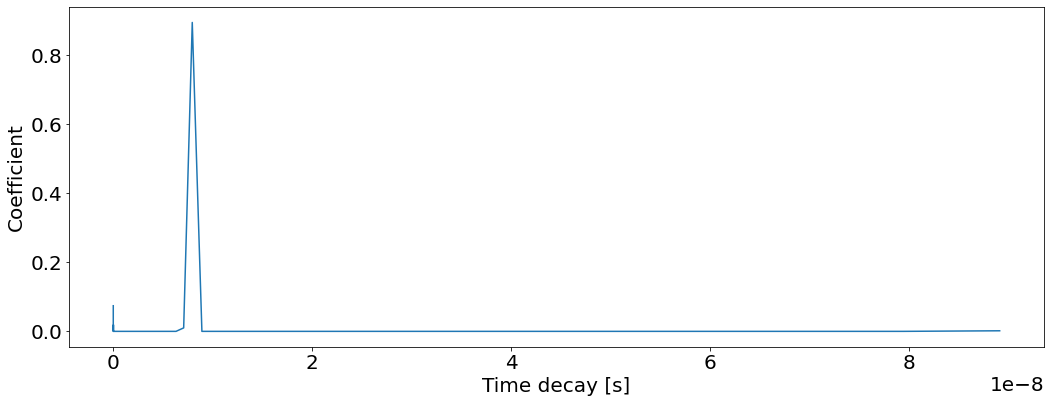

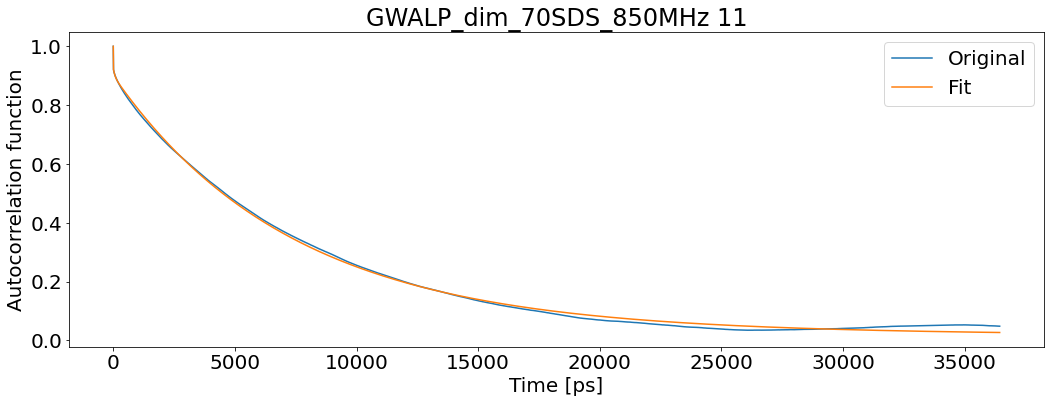

T1: 0.9587263885829552 T2: 0.05928537376368353 NOE: 0.8122732039132563


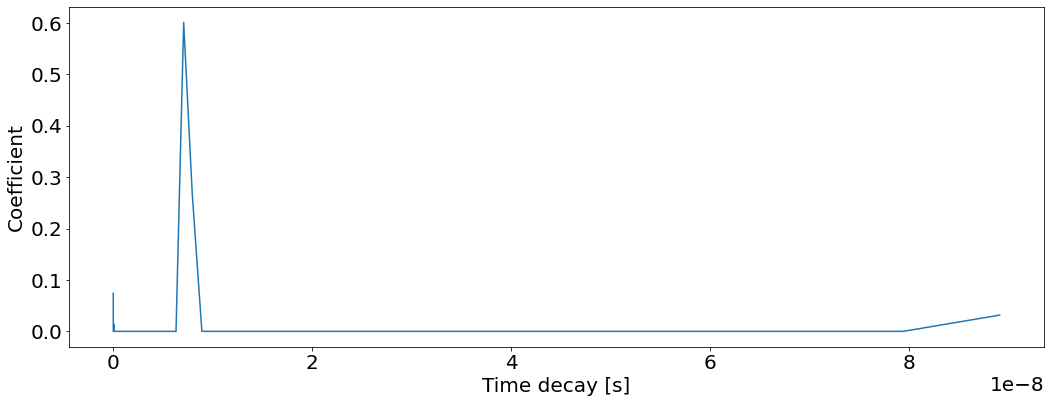

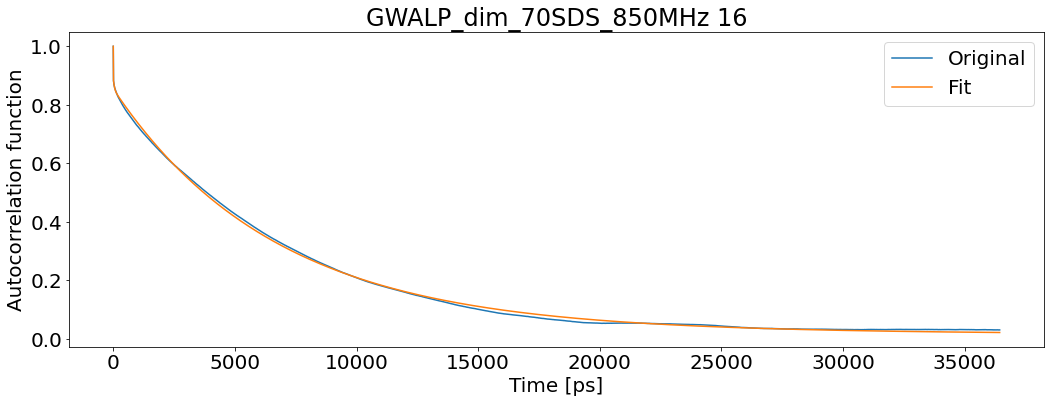

T1: 0.9282687426745119 T2: 0.06782629452013388 NOE: 0.8113395648978251


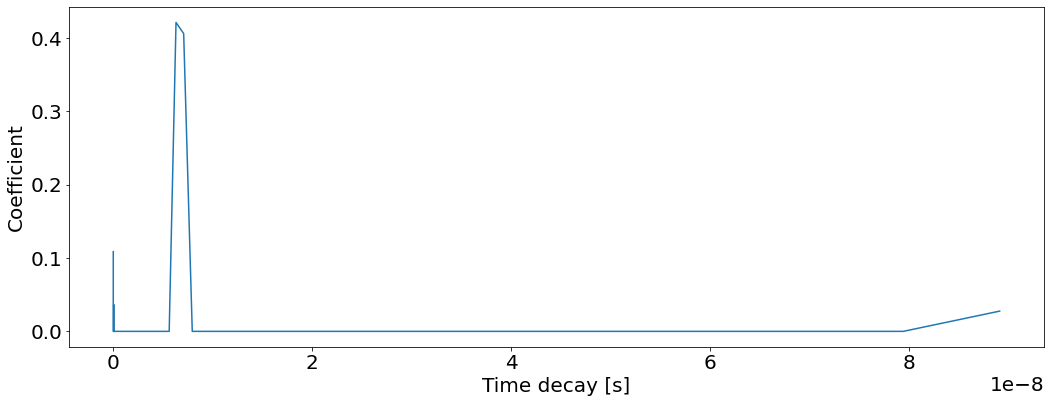

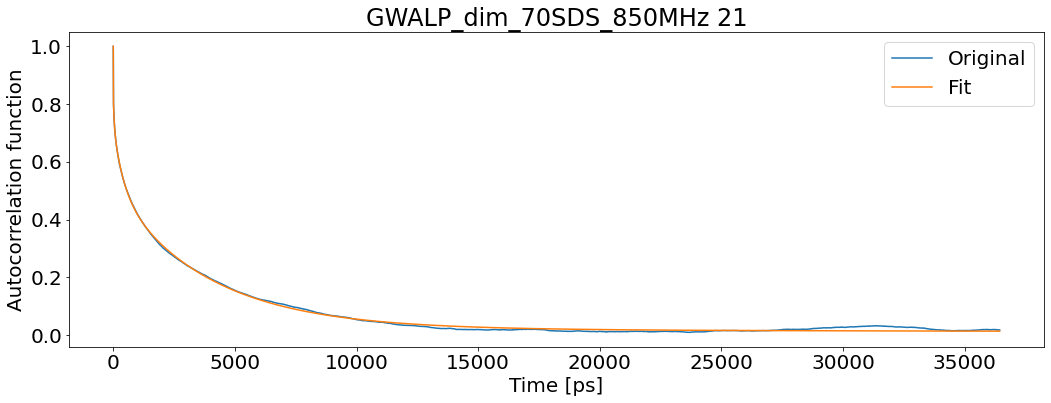

T1: 0.7815738884721553 T2: 0.13578061832078825 NOE: 0.37654485215333433


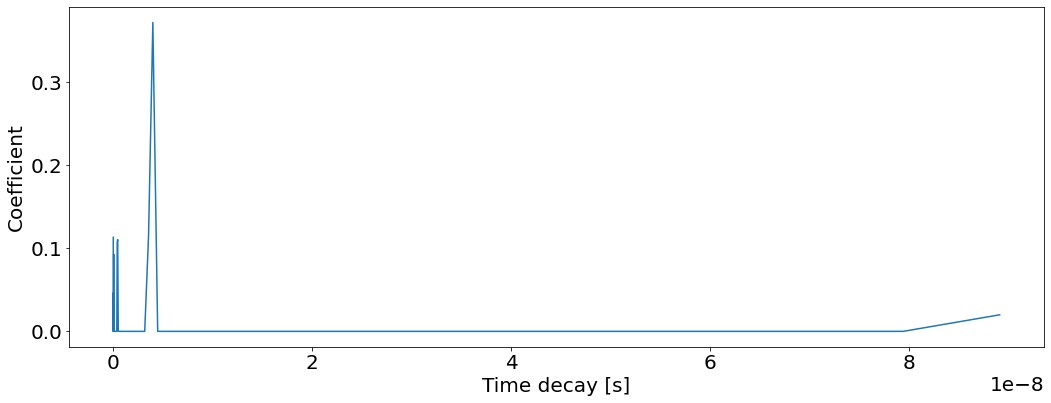

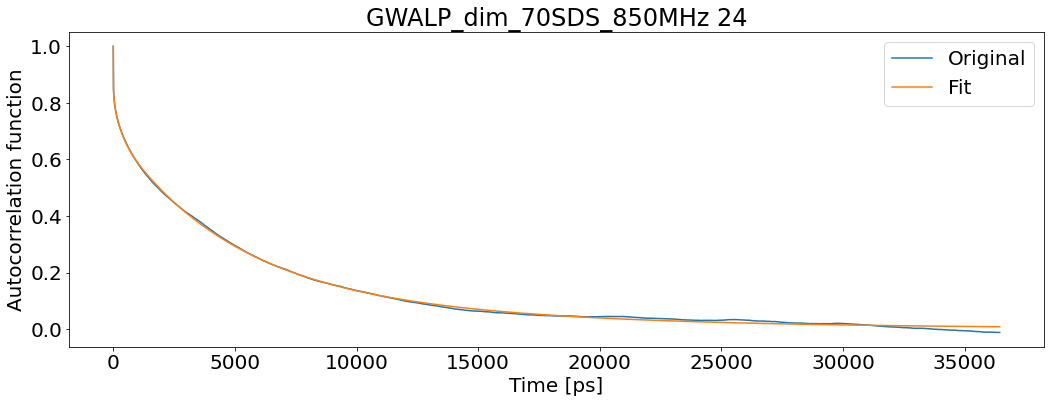

T1: 0.8454167364524657 T2: 0.11511740675386872 NOE: 0.5561348071420074


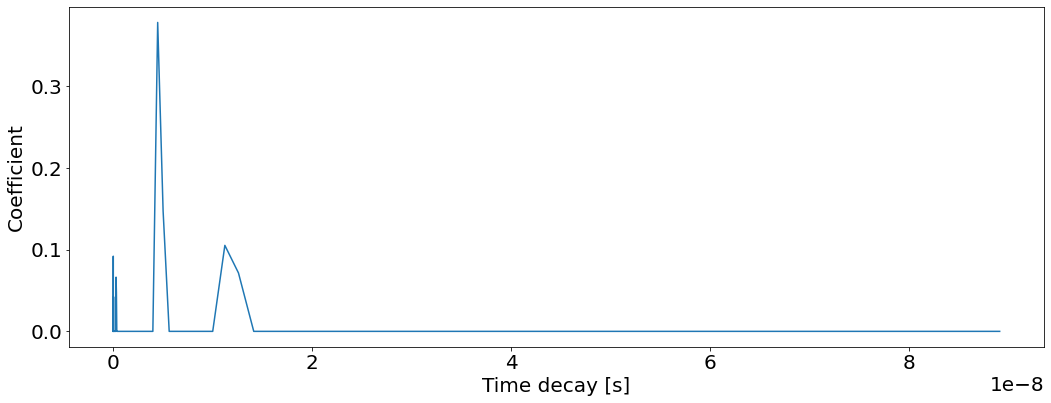

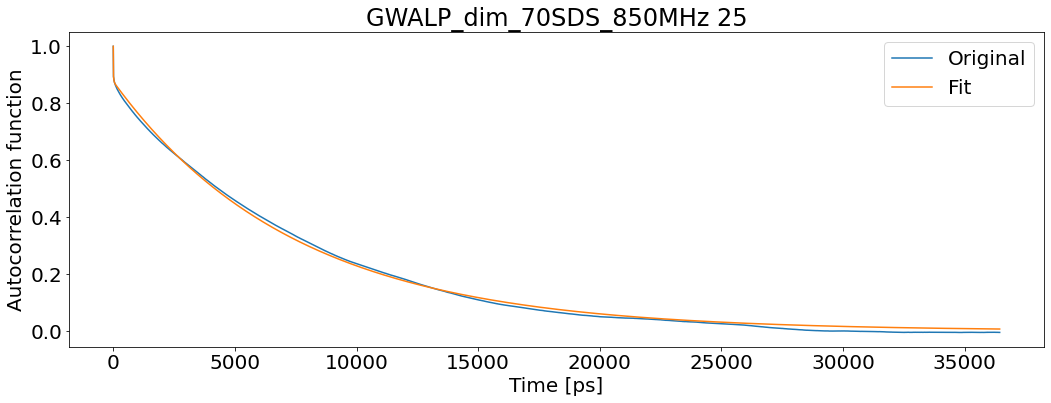

T1: 0.9708770062484137 T2: 0.08243363878014796 NOE: 0.8369982711470103


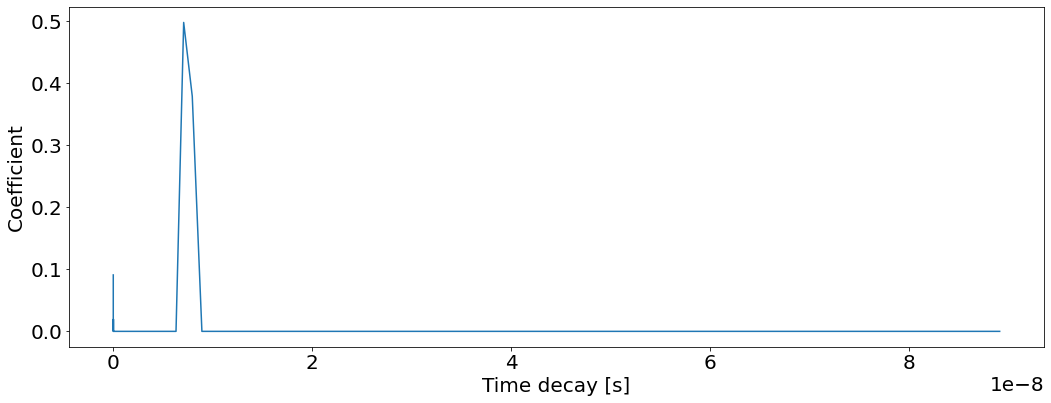

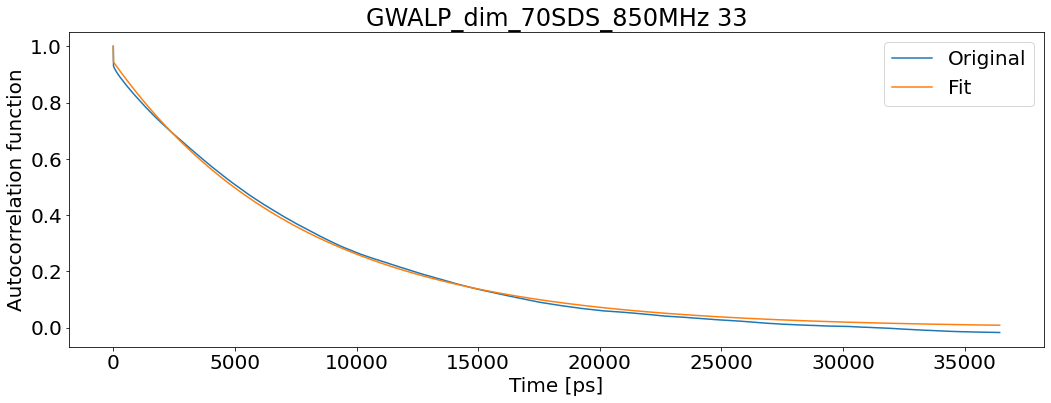

T1: 0.9407861945003337 T2: 0.07343074781661169 NOE: 0.8541221473711904


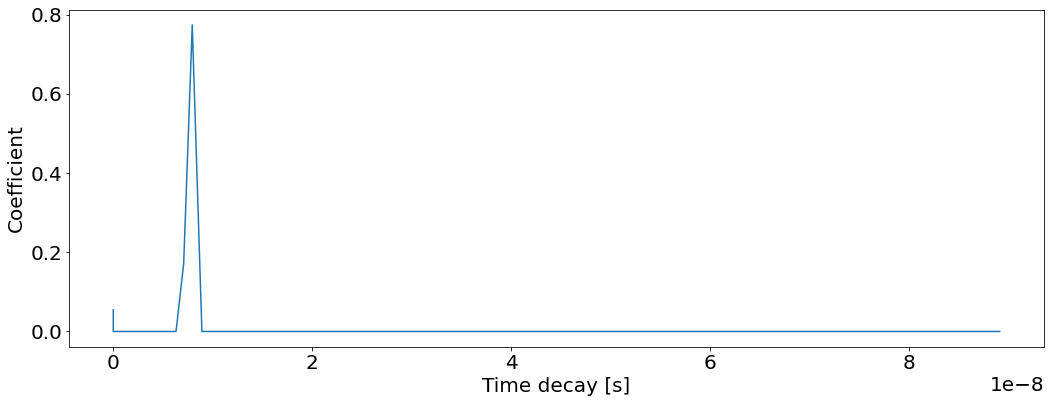

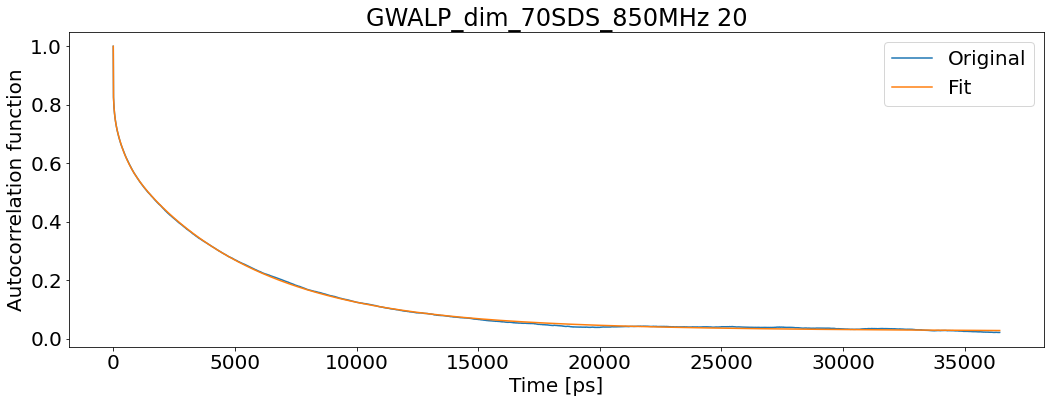

T1: 0.8704259833847909 T2: 0.07900349226903858 NOE: 0.5192509466518074


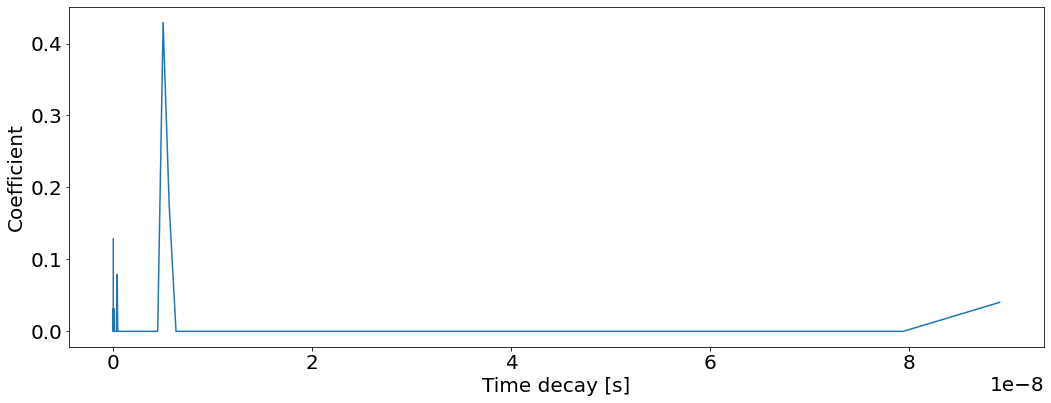

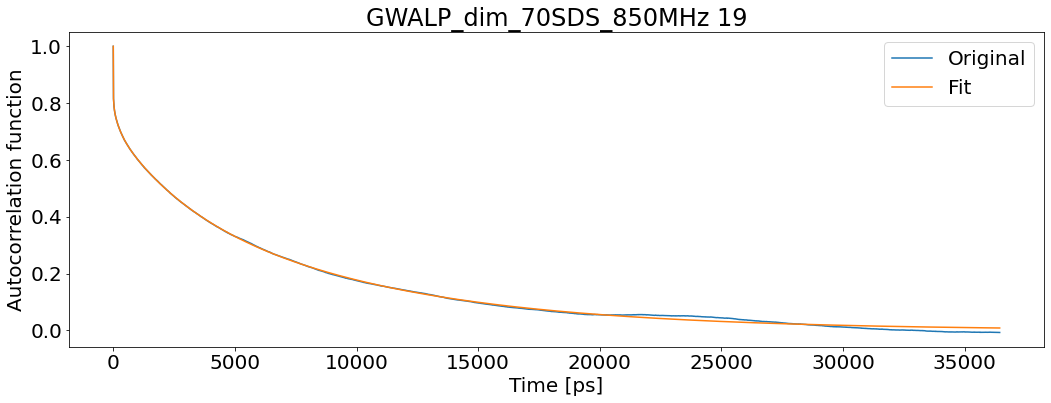

T1: 0.955430005908613 T2: 0.10174747683712097 NOE: 0.6053552378898264


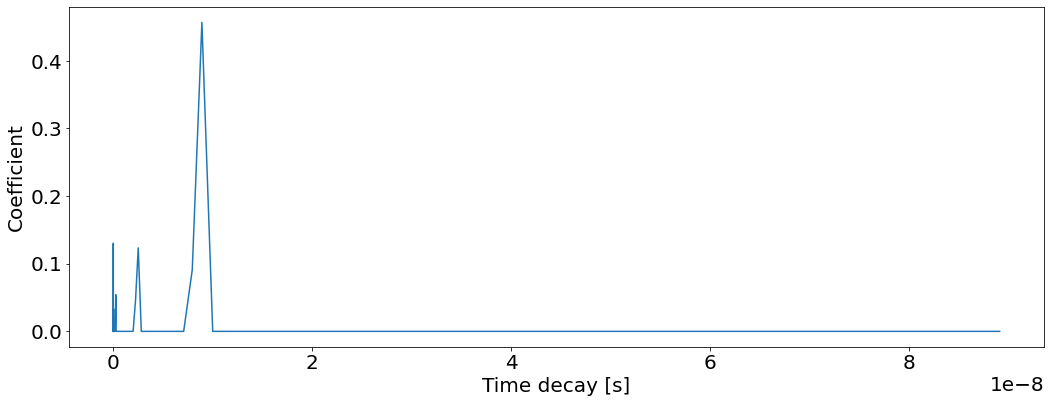

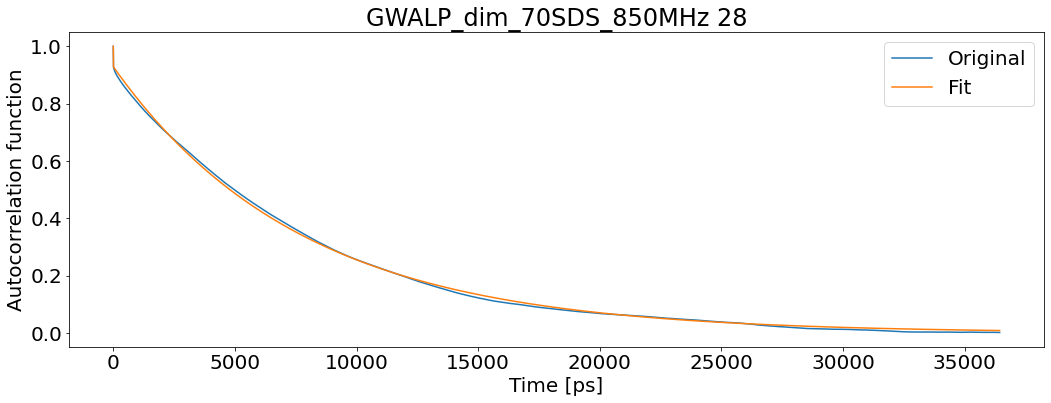

T1: 0.952467446748404 T2: 0.07506157131330589 NOE: 0.8536098248921183


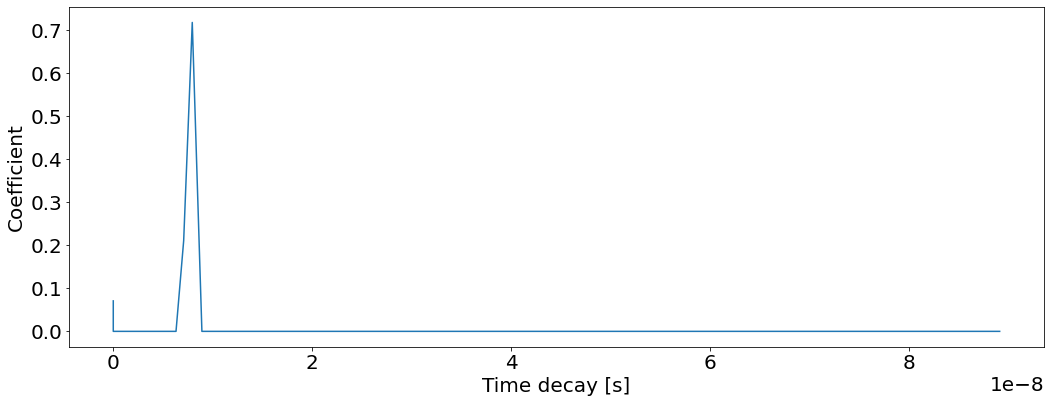

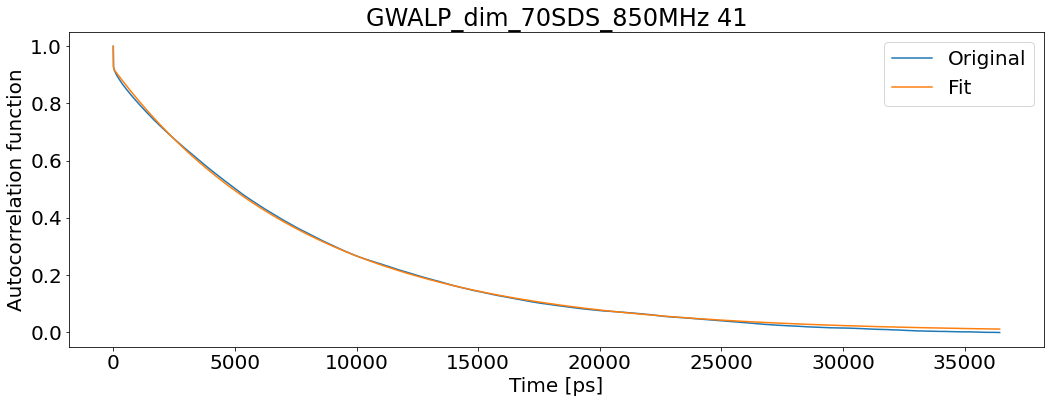

T1: 0.992645219895431 T2: 0.07302100609713957 NOE: 0.8496545913323488


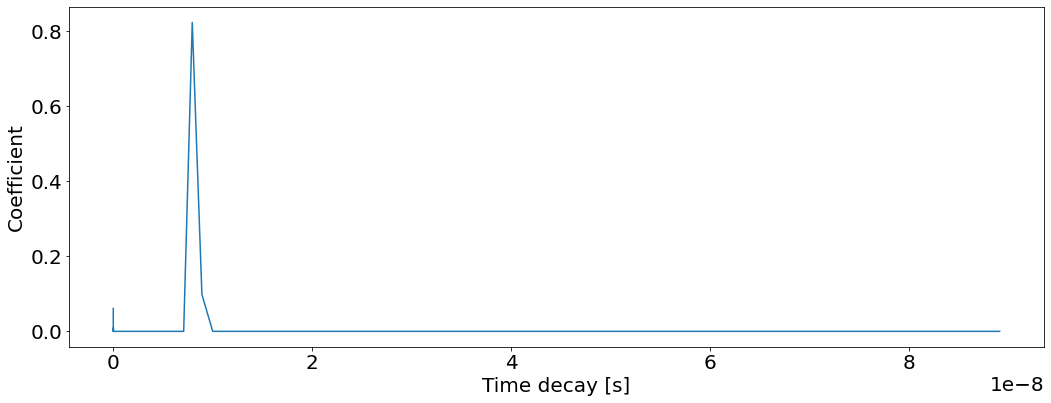

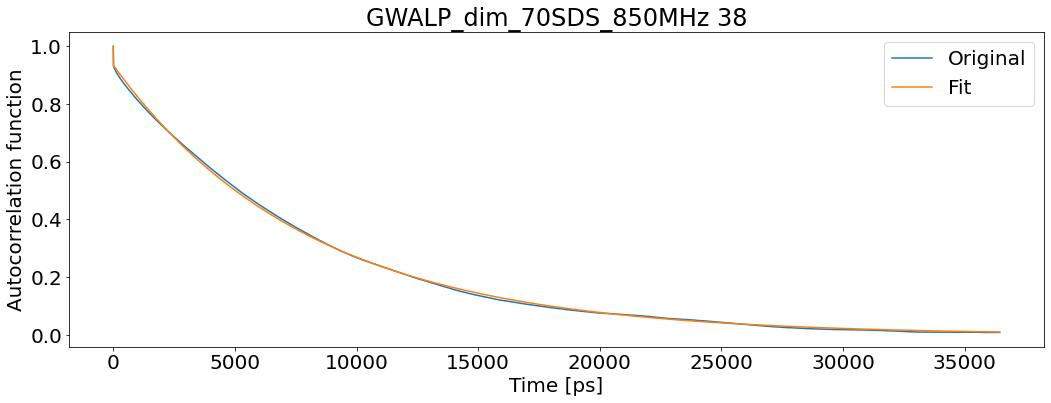

T1: 0.9796380716517541 T2: 0.07213013626915393 NOE: 0.8542803586255623


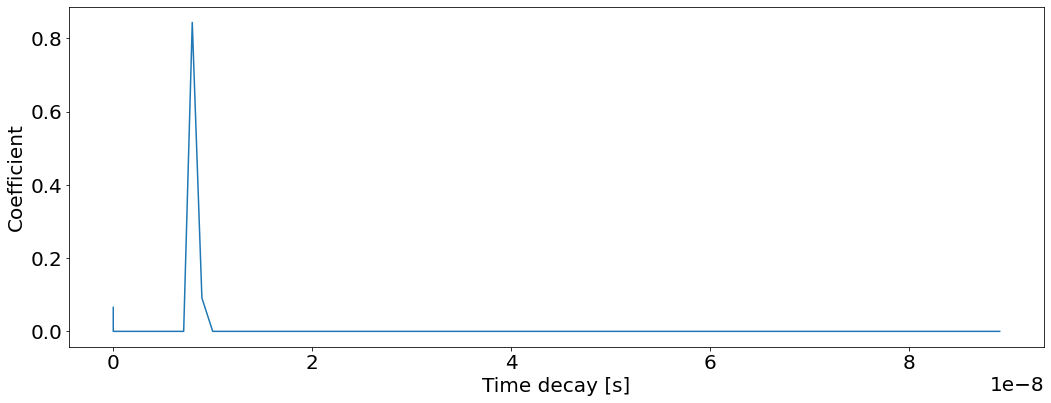

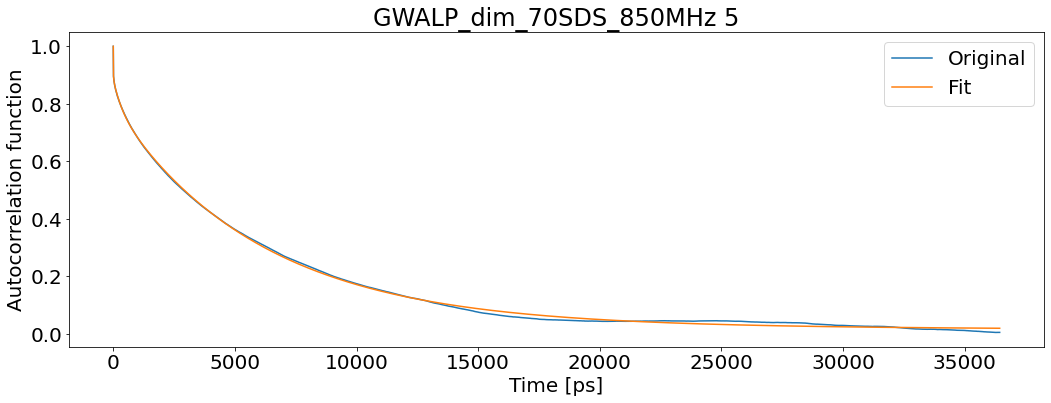

T1: 0.8401186913544816 T2: 0.07579690466188284 NOE: 0.6542743025718876


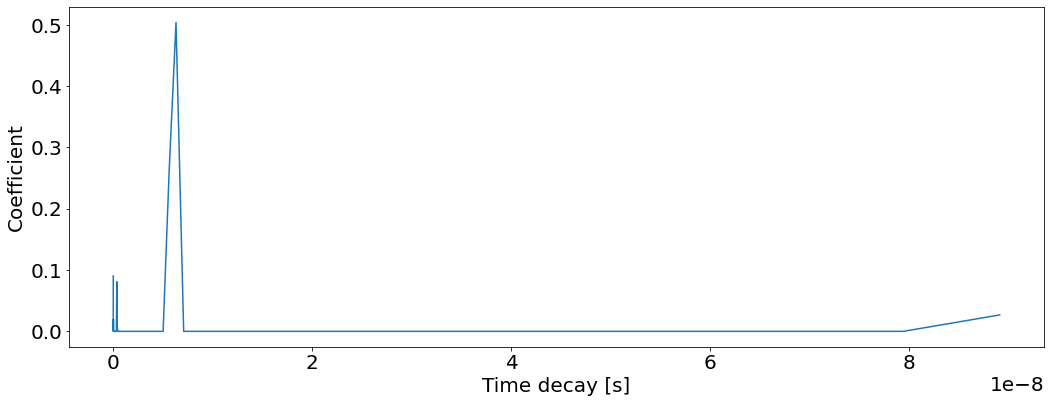

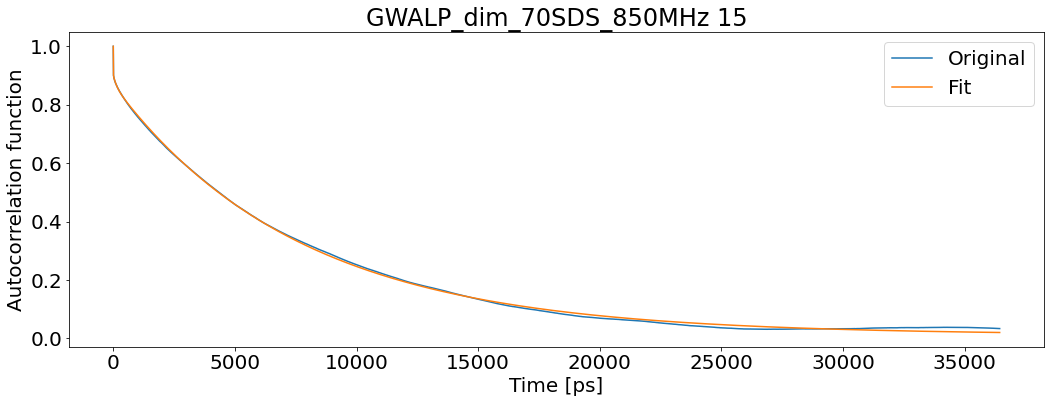

T1: 1.0016200133891022 T2: 0.06597871205165773 NOE: 0.7645534505169983


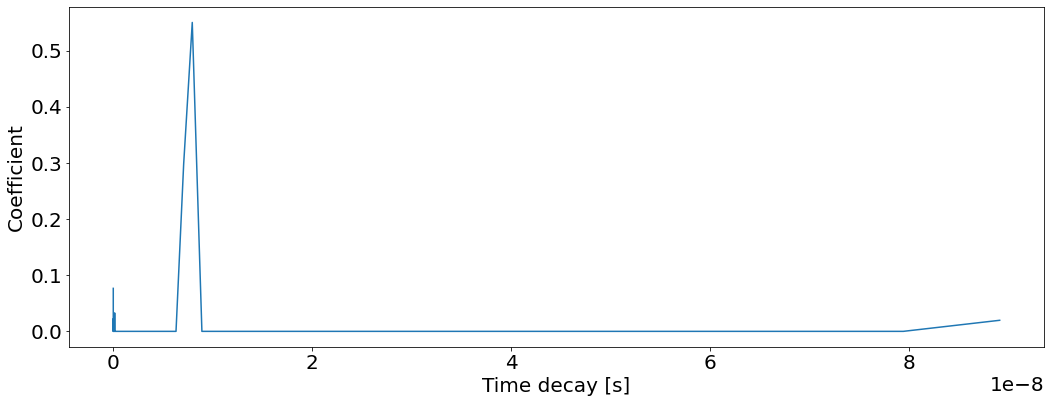

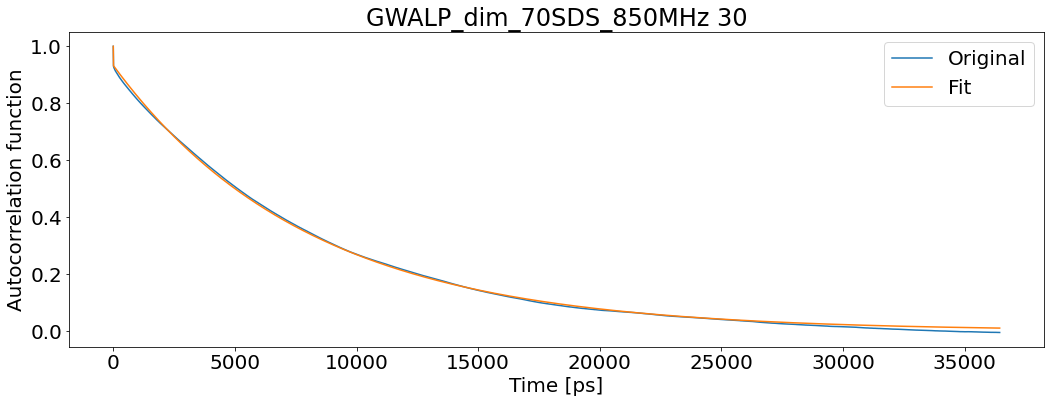

T1: 0.9799366675179223 T2: 0.07236148556844504 NOE: 0.8542211905021877


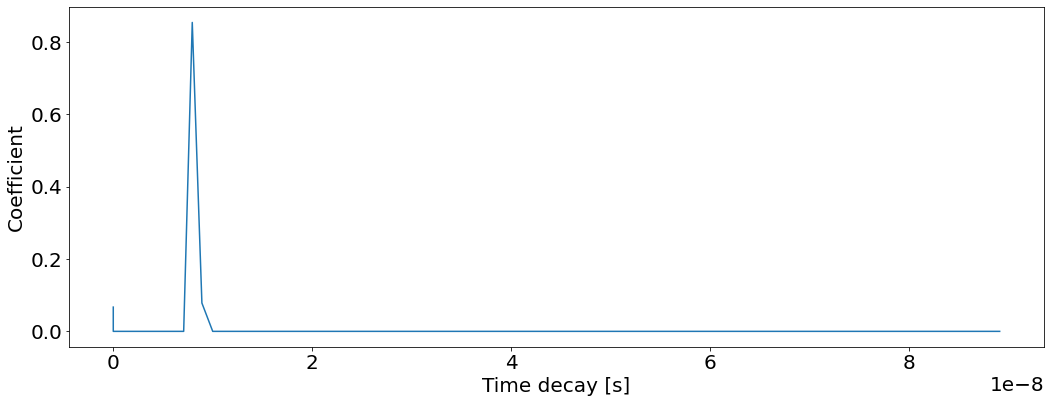

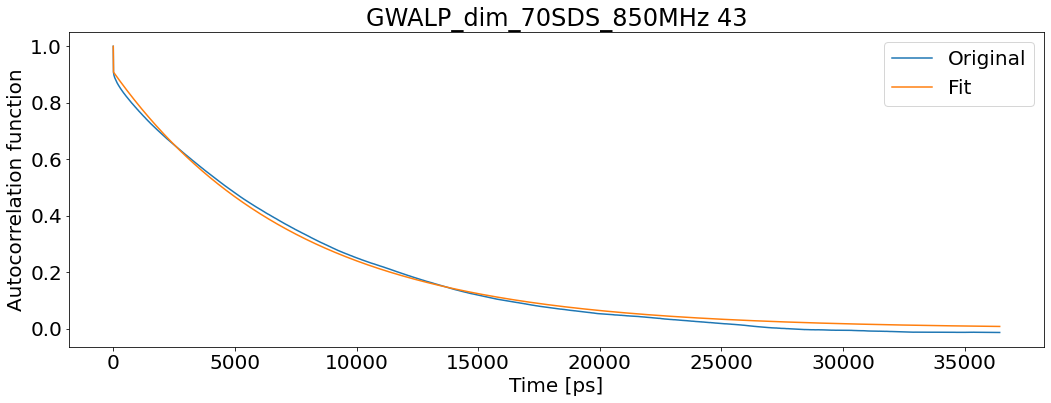

T1: 0.9454337237134555 T2: 0.07888938866761692 NOE: 0.8526202494378621


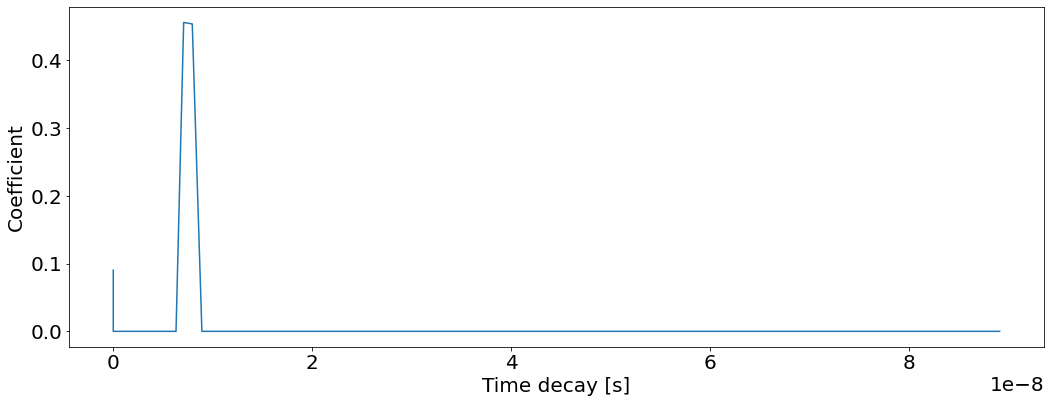

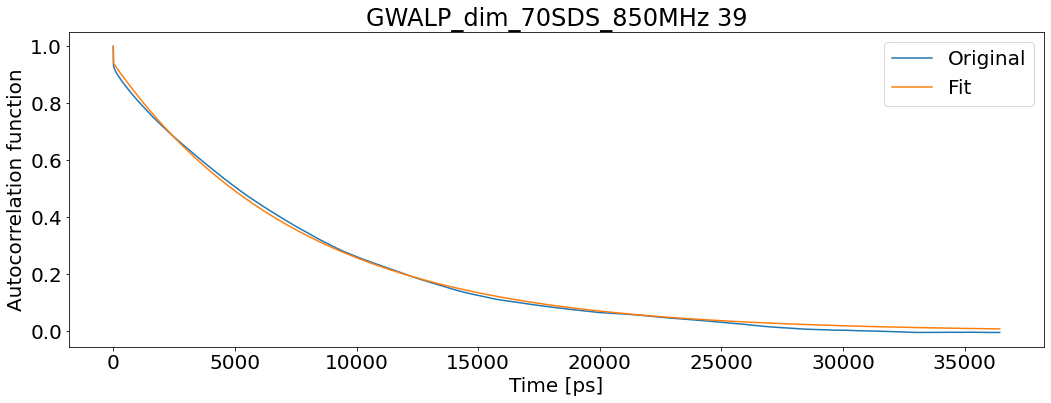

T1: 0.9394075656419038 T2: 0.07415551031191503 NOE: 0.85391875578564


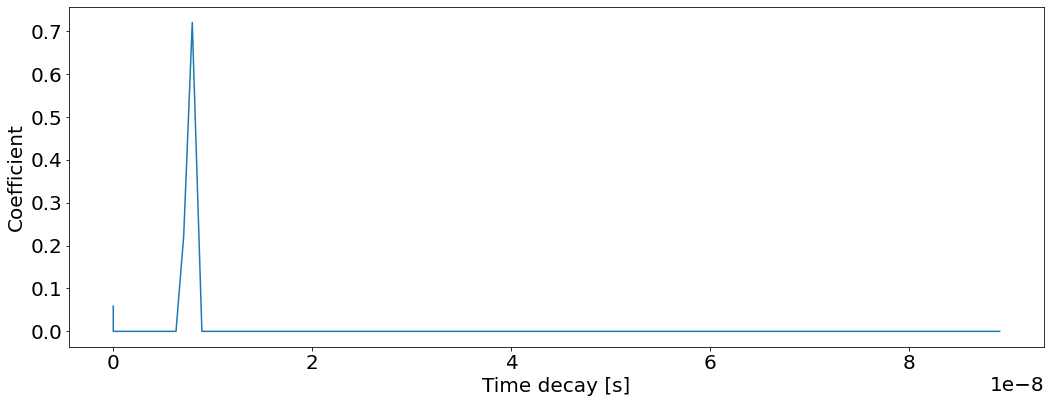

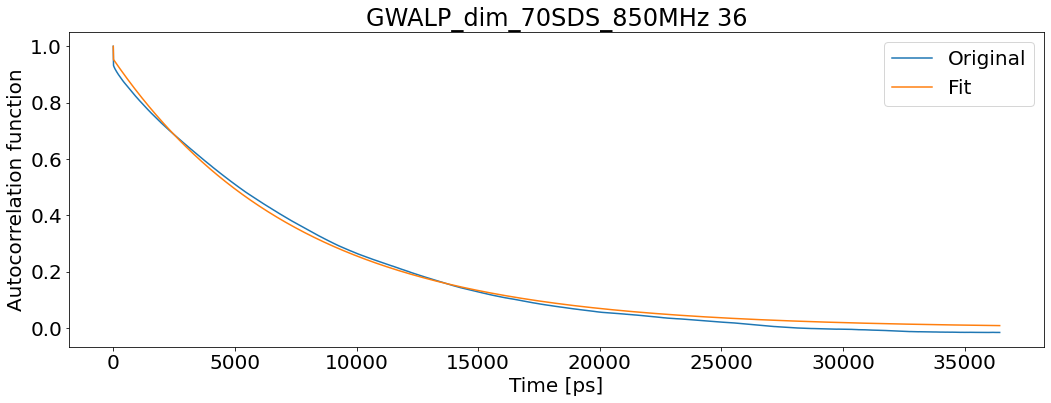

T1: 0.9110090757916791 T2: 0.07438534379807454 NOE: 0.8539652974651419


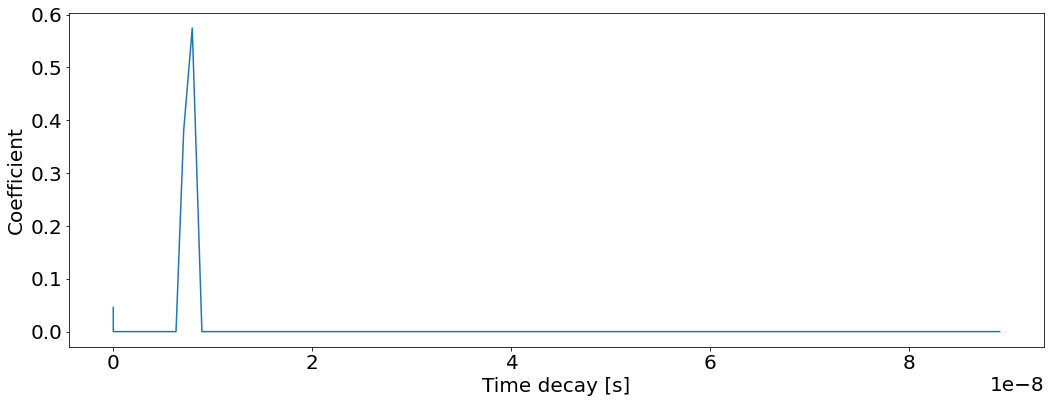

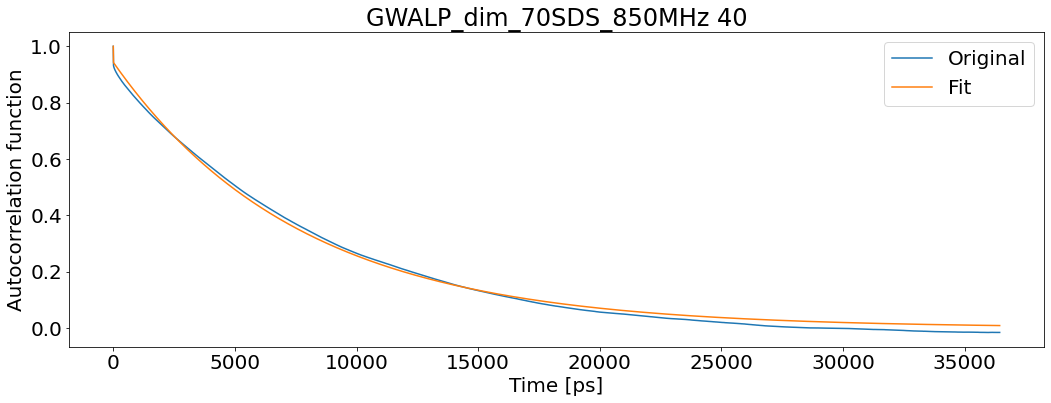

T1: 0.9306630414830734 T2: 0.07451801792072324 NOE: 0.8538508027916007


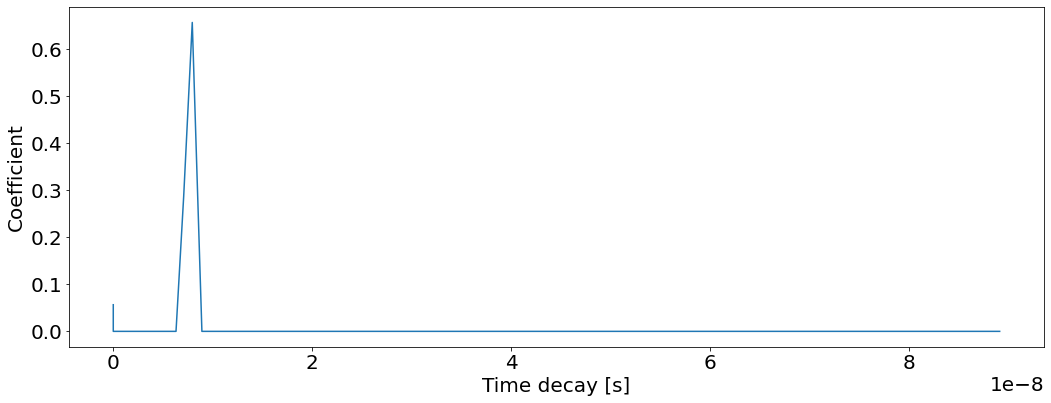

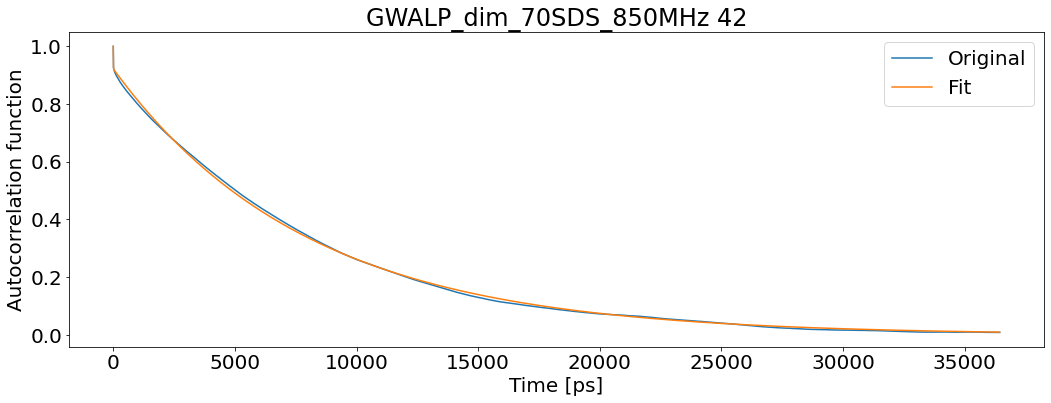

T1: 0.9823281777946072 T2: 0.07388783764550227 NOE: 0.8504103979872188


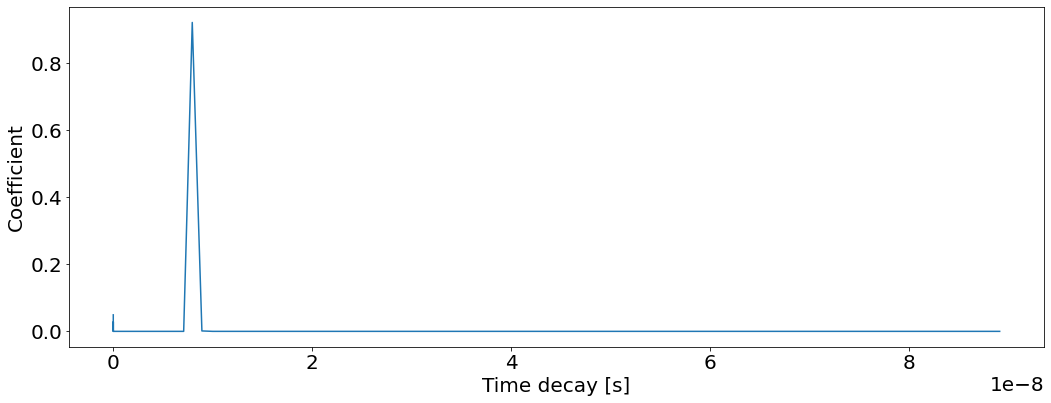

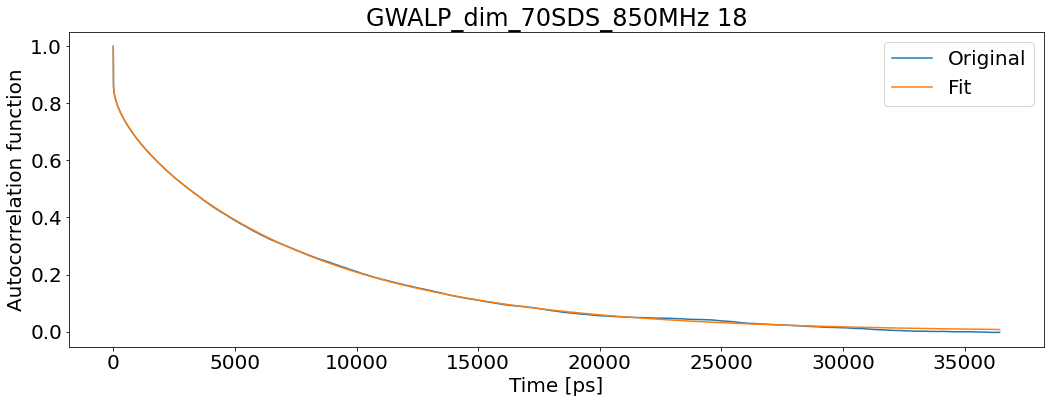

T1: 0.9968552860745689 T2: 0.09087834784981504 NOE: 0.666897075627046


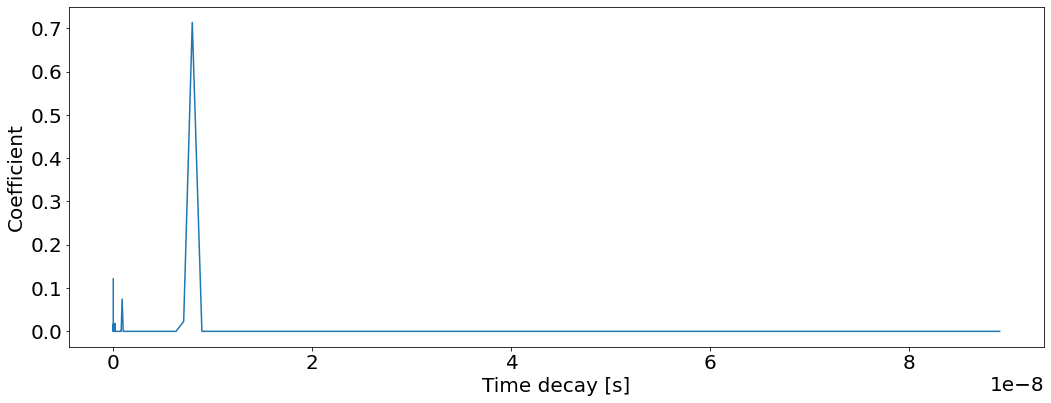

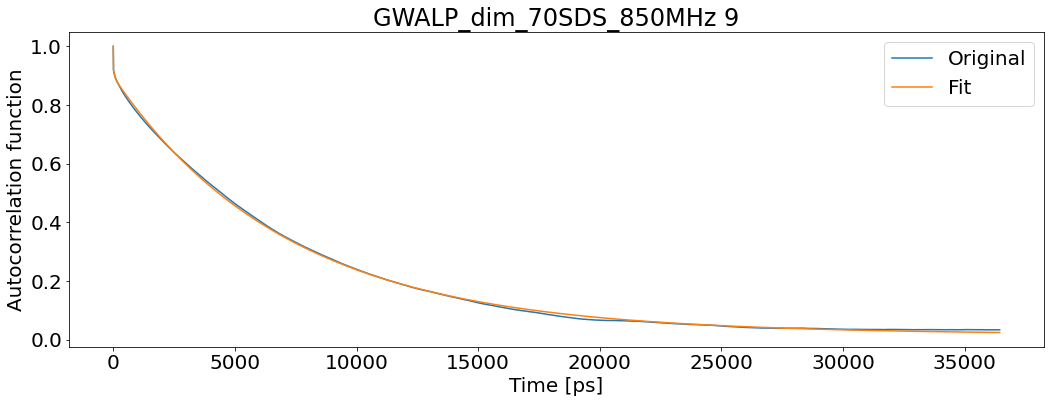

T1: 0.9351431993571766 T2: 0.06257154421736355 NOE: 0.8129692502037187


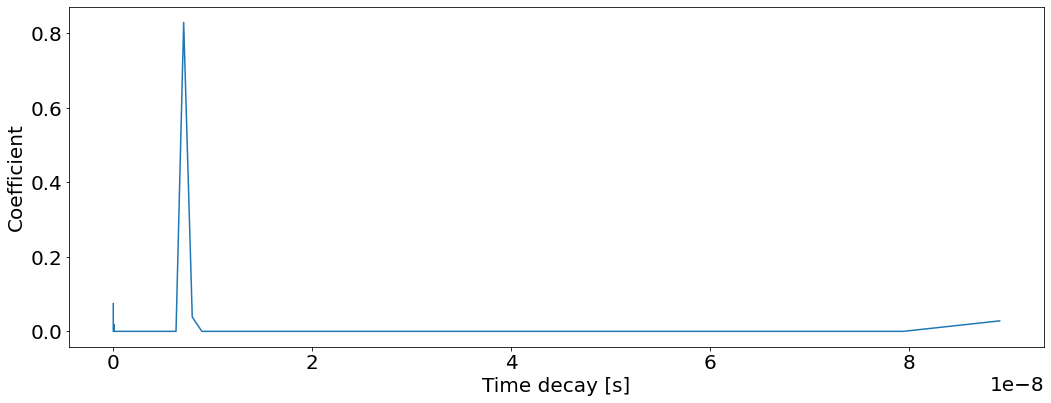

In [94]:
"""Analyze the whole content of a folder"""
aminoAcids70=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)

In [87]:
aminoAcids40=aminoAcids

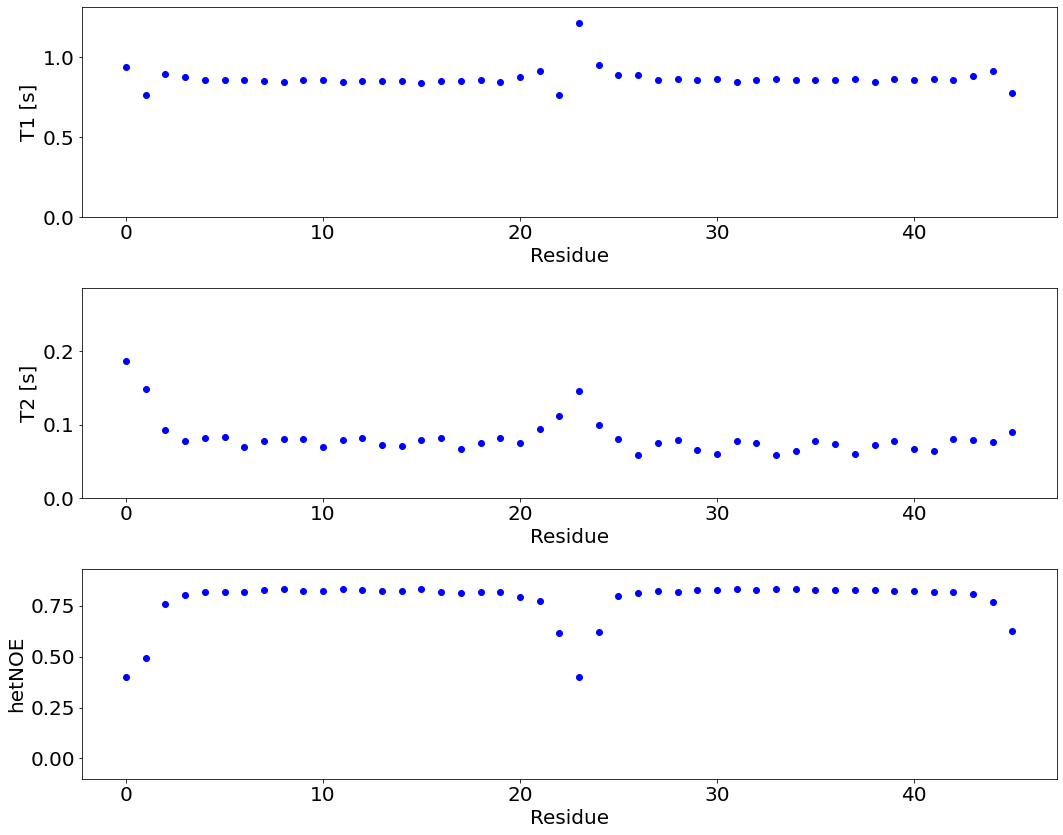

In [20]:
rt.plot_T1_T2_noe(aminoAcids,yaml_output)

In [85]:
merge=5 # number of consequent points to be merged (works on log scale!!)
groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value
ylim=[10**(-9),10**(-7)*2] # useful for observing details
#ylim=None # if None the whole range of available data is plotted
title="Time coefficients, 40 SDS"
xlabel="Residue of GWALP"

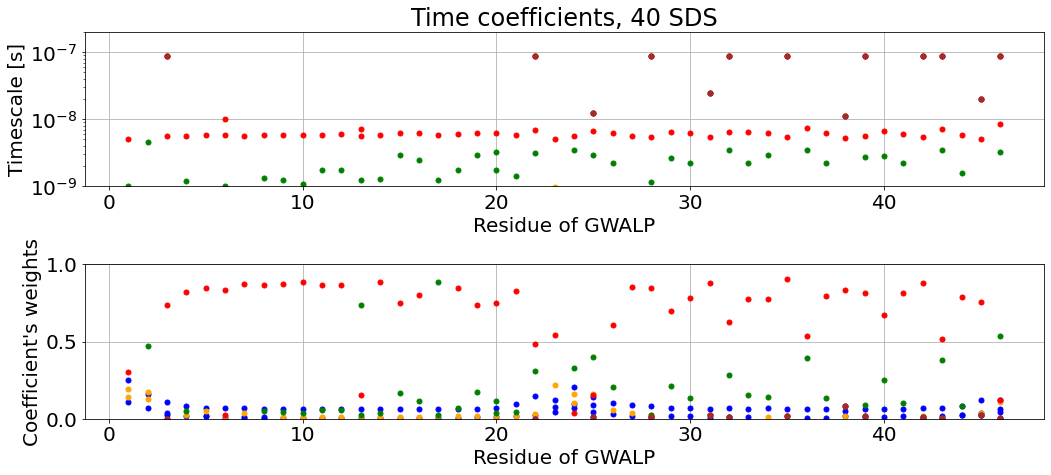

In [86]:
rt.PlotTimescales(aminoAcids,merge,groupTimes,title,xlabel,ylim)

In [23]:
save_dest="GWALP_dim_40SDS_850MHz.yaml"
with open(save_dest) as yaml_file:
    gwalp_40= yaml.load(yaml_file,Loader=yaml.FullLoader)

save_dest="GWALP_dim_50SDS_850MHz.yaml"
with open(save_dest) as yaml_file:
    gwalp_50= yaml.load(yaml_file,Loader=yaml.FullLoader)
    
save_dest="GWALP_dim_60SDS_850MHz.yaml"
with open(save_dest) as yaml_file:
    gwalp_60= yaml.load(yaml_file,Loader=yaml.FullLoader)
    
save_dest="GWALP_dim_70SDS_850MHz.yaml"
with open(save_dest) as yaml_file:
    gwalp_70= yaml.load(yaml_file,Loader=yaml.FullLoader)

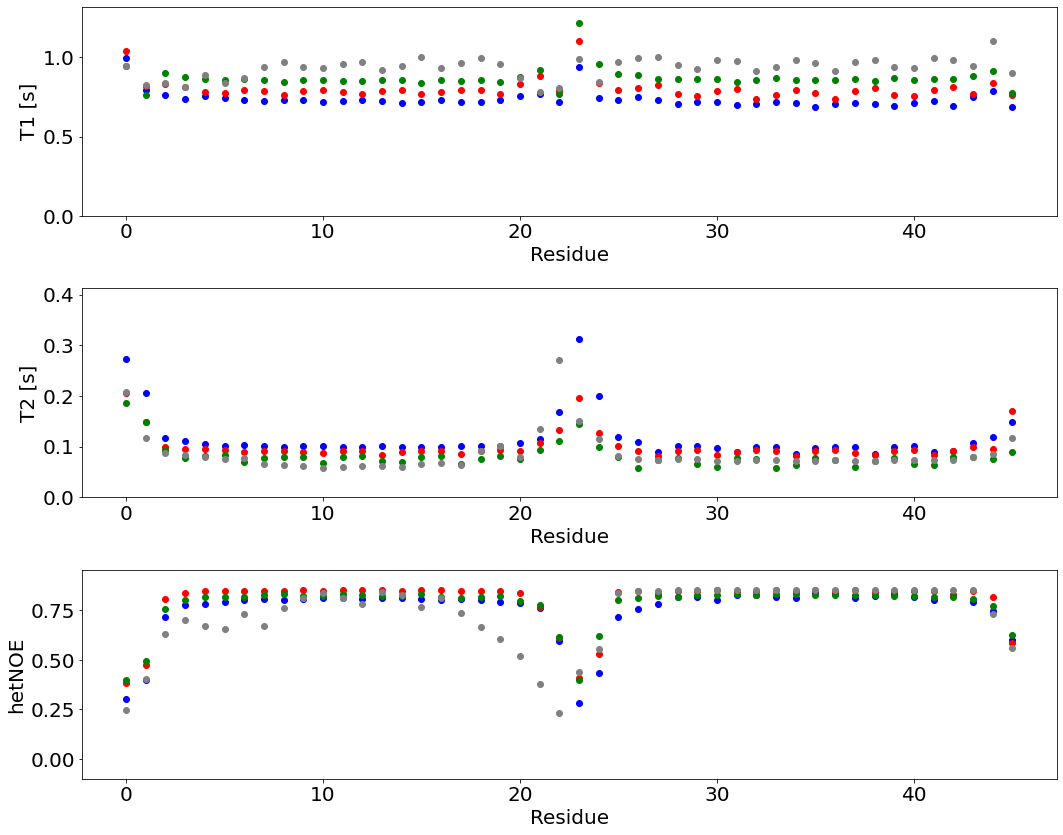

In [27]:
rt.plot_replicas(gwalp_40,gwalp_50,gwalp_60,gwalp_70)

In [80]:
gwalp_40

{0: {'T1': 0.9913505445948276,
  'T2': 0.27293848838903867,
  'hetNOE': 0.3040825119173708},
 1: {'T1': 0.7907313291487835,
  'T2': 0.206690103867474,
  'hetNOE': 0.3960528034894687},
 2: {'T1': 0.7601573282859462,
  'T2': 0.1166173874118019,
  'hetNOE': 0.7165955661786039},
 3: {'T1': 0.7333958292512325,
  'T2': 0.1107609968910528,
  'hetNOE': 0.7752838247110043},
 4: {'T1': 0.75493993613661,
  'T2': 0.10524465693180338,
  'hetNOE': 0.7832447177779005},
 5: {'T1': 0.7415554684522235,
  'T2': 0.10210604887204054,
  'hetNOE': 0.7893380953642382},
 6: {'T1': 0.7296353663799016,
  'T2': 0.10359450534507285,
  'hetNOE': 0.8000370683510175},
 7: {'T1': 0.7215612796682939,
  'T2': 0.1021718671794216,
  'hetNOE': 0.808086361794039},
 8: {'T1': 0.733085808396611,
  'T2': 0.10019395464256536,
  'hetNOE': 0.8037730856259718},
 9: {'T1': 0.7309595882888206,
  'T2': 0.10099348945737072,
  'hetNOE': 0.8060596577304939},
 10: {'T1': 0.7177983870936594,
  'T2': 0.10120819283432796,
  'hetNOE': 0.8141

In [136]:
def plot_replicas(save_name,plotType,number,*replicas):
    plt.rcParams["figure.figsize"] = [15.00, 12]
    plt.rcParams["figure.autolayout"] = True

    fig, (ax1, ax2, ax3) = plt.subplots(3)
    
    ax1.set_ylabel("T1 [s]")
    ax1.set_xlabel("Residue")
    ax2.set_ylabel("T2 [s]")
    ax2.set_xlabel("Residue")
    ax3.set_ylabel("hetNOE")
    ax3.set_xlabel("Residue")
    max_T1=0
    max_T2=0
    max_noe=0
    min_noe=0
    col=["blue","red","green","brown","gray"]
    colors=[]
    

    ax1.plot(GWALP_res,T1_GWALP+T1_GWALP,"s",color="black",markersize=10)
    ax2.plot(GWALP_res,T2_GWALP+T2_GWALP,"s",color="black",markersize=10)
    ax3.plot(GWALP_res,hetNOE_GWALP+hetNOE_GWALP,"s",color="black",markersize=10)
    
    for colo in col:
        for nu in range(number):
            colors.append(colo)
            
    #colors=["blue","blue","blue","red","red","red","green","green","green","gray","gray","gray","brown","brown","brown"]
    averages={}
    for i in replicas[0]:
        averages[i]={}
        for j,replica in enumerate(replicas):
            if (j//number) not in averages[i]:
                averages[i][(j//number)]={}
                if "T1" not in averages[i][(j//number)]:
                    averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                    averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                    averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
            else:
                averages[i][(j//number)]["T1"].append(replica[i]["T1"])
                averages[i][(j//number)]["T2"].append(replica[i]["T2"])
                averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
            if plotType=="all":
                ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"o",color=colors[j])
                ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"o",color=colors[j])
                ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"o",color=colors[j])
            max_T2=max(max_T2,replica[i]["T2"])
            max_T1=max(max_T1,replica[i]["T1"])
            max_noe=max(max_noe,replica[i]["hetNOE"])
            min_noe=min(min_noe,replica[i]["hetNOE"])
        if plotType=="average":
            for j,exp in enumerate(averages[i]):
                ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
                ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
                ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])
            
    ax1.set_ylim([0.5,max_T1+0.1 ])
    ax2.set_ylim([0,max_T2+0.1 ])
    ax3.set_ylim([min_noe-0.1,max_noe+0.3 ])
    ax1.text(0,0.35,"GWALP, 40 SDS",color=col[0],fontsize=20)
    ax1.text(0,0.20,"GWALP, 50 SDS",color=col[1],fontsize=20)
    ax1.text(0,0.05,"GWALP, 60 SDS",color=col[2],fontsize=20)
    ax1.text(0,-0.10,"GWALP, 70 SDS",color=col[3],fontsize=20)
    
    
    
    plt.savefig(save_name)
    
    
def PlotTimescales_replicas(merge,groupTimes,title="Title",xlabel="xlabel",ylim=None,ylim_weig=None,*aminoAcidsReplicas):
    plt.rcParams["figure.figsize"] = [15.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams.update({'font.size': 20})

    
    
    fig, (ax1, ax2) = plt.subplots(2)

    ax1.title.set_text(title)
    
    
    
    ax1.grid()
    #ax1.set_yscale('log')
    ax1.set_ylabel("Timescale [s]")
    ax1.set_xlabel(xlabel)
    
    
    for residue in range(1,48):
        ax1.axvline(x = residue, color = '0.85', )
    
    
    ax2.grid()
    ax2.set_ylim(0,1)
    ax2.set_ylabel("Coefficient's weights")
    ax2.set_xlabel(xlabel)
    
    colors=["blue","orange","green","red","purple","brown","ping","gray","olive","cyan"]
    markers=["o","v","s","*","P","D","p","X"]
    for k,aminoAcids in enumerate(aminoAcidsReplicas):
        

        step_exp=(aminoAcids[0].biggest_corr_time-aminoAcids[0].smallest_corr_time)/aminoAcids[0].N_exp_to_fit
        Ctimes = 10 ** np.arange(aminoAcids[0].smallest_corr_time, aminoAcids[0].biggest_corr_time, step_exp)
        Ctimes = Ctimes * 0.001 * 10 ** (-9);
        Ctimes_list=[Ctimes]

        for i in range(len(aminoAcids)):
            Ctimes_list.append(aminoAcids[i].Coeffs)
            Ctimes=np.array(Ctimes_list)
            Ctimes=np.transpose(Ctimes)
        
        ax1.set_ylim(Ctimes[0,0]/10,Ctimes[-1,0]*10)

        working_Ctimes=np.copy(Ctimes)

        #ax1.set_ylim([10**(-12.4), 10**(-6.8)])
        if not ylim==None:
            ax1.set_ylim(ylim[0],ylim[1])
            
        if not ylim_weig==None:
            ax2.set_ylim(ylim_weig[0],ylim_weig[1])    
            

        """Plot the timescales, user specifies the merge to be used.
        The merge works as follow: The code finds the first timescale with
        weight bigger bigger than 0 and merges with 'merge' subsequent timescales.
        The final result is plotted as a weighted average of the merged points."""

        
        
        for residue in range(1,working_Ctimes.shape[1]):
            timescale=0
            while timescale < working_Ctimes.shape[0]:
                #print("{} {} \n".format(i, j))
                if working_Ctimes[timescale,residue]>0:
                    time_to_plot=working_Ctimes[timescale,0]
                    if merge>1:
                        time_to_plot=0
                        total_weight=0
                        for i in range(0,merge):
                            try:
                                time_to_plot+=working_Ctimes[timescale+i,0]*working_Ctimes[timescale+i,residue]
                                total_weight+=working_Ctimes[timescale+i,residue]
                            except:
                                pass
                        time_to_plot/=total_weight


                    if time_to_plot<groupTimes[0]:
                        ax1.plot(residue+k*0.15, time_to_plot, marker=markers[0], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    else:
                        for i in range(0,len(groupTimes)-1):
                            if time_to_plot>groupTimes[i] and time_to_plot<groupTimes[i+1]:
                                ax1.plot(residue+k*0.15, time_to_plot, marker=markers[i+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                            elif time_to_plot>groupTimes[-1]:
                                ax1.plot(residue+k*0.15, time_to_plot, marker=markers[len(groupTimes)+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])

                    timescale+=merge-1
                timescale+=1






        for residue in range(1,working_Ctimes.shape[1]):
            timescale=0
            while timescale < working_Ctimes.shape[0]:
                #print("{} {} \n".format(i, j))
                if working_Ctimes[timescale,residue]>0:
                    time_to_plot=working_Ctimes[timescale,0]
                    if merge>1:
                        time_to_plot=0
                        total_weight=0
                        for i in range(1,merge):
                            try:
                                total_weight+=working_Ctimes[timescale,residue]
                                time_to_plot+=working_Ctimes[timescale,0]*working_Ctimes[timescale,residue]
                                working_Ctimes[timescale,residue]+=working_Ctimes[timescale+i,residue]

                            except:
                                pass
                        time_to_plot/=total_weight


                    if time_to_plot<groupTimes[0]:
                        ax2.plot(residue+k*0.15, working_Ctimes[timescale,residue], marker=markers[0], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    else:
                        for i in range(0,len(groupTimes)-1):
                            if time_to_plot>groupTimes[i] and time_to_plot<groupTimes[i+1]:
                                ax2.plot(residue+k*0.15, working_Ctimes[timescale,residue], marker=markers[i+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                            elif time_to_plot>groupTimes[-1]:
                                ax2.plot(residue+k*0.15, working_Ctimes[timescale,residue], marker=markers[len(groupTimes)+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    timescale+=merge-1
                timescale+=1

     
    
    plt.show()   


In [29]:
import matplotlib.pyplot as plt
import sys
import os
import yaml
import numpy as np
sys.path.append('/home/local/nenciric/Documents/git/COR15A_Tobi/Analysis')
import ExperimentalRelaxationTimes as ERT
import matplotlib.patches as patches

In [59]:
GWALP_res=[]
T1_GWALP=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/Gwalp_DSDS_T1_experiment.dat") as f:
    for line in f:
        GWALP_res.append(int(line.split()[0]))
        T1_GWALP.append(float(line.split()[1]))
        
        
T2_GWALP=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/Gwalp_DSDS_T2_experiment.dat") as f:
    for line in f:
        T2_GWALP.append(float(line.split()[1]))
        
hetNOE_GWALP=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/Gwalp_DSDS_hetnoe_experiment.dat") as f:
    for line in f:
        hetNOE_GWALP.append(float(line.split()[1]))
        
GWALP_res1= [x - 1 for x in GWALP_res]
GWALP_res2= [x + 22 for x in GWALP_res]
GWALP_res=GWALP_res1+GWALP_res2

In [48]:
GWALP_res

[2, 6, 10, 12, 14, 20, 27, 31, 35, 37, 39, 45]

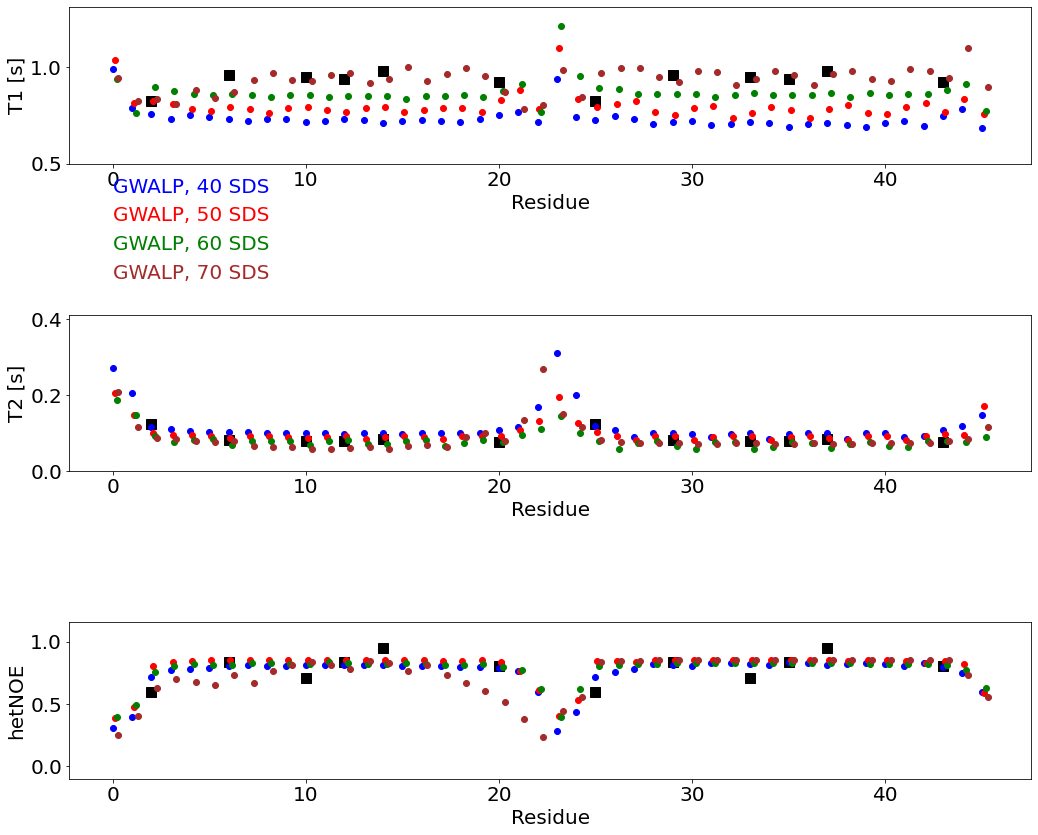

In [60]:
plot_replicas("GWALP.pdf","all",1,gwalp_40,gwalp_50,gwalp_60,gwalp_70)

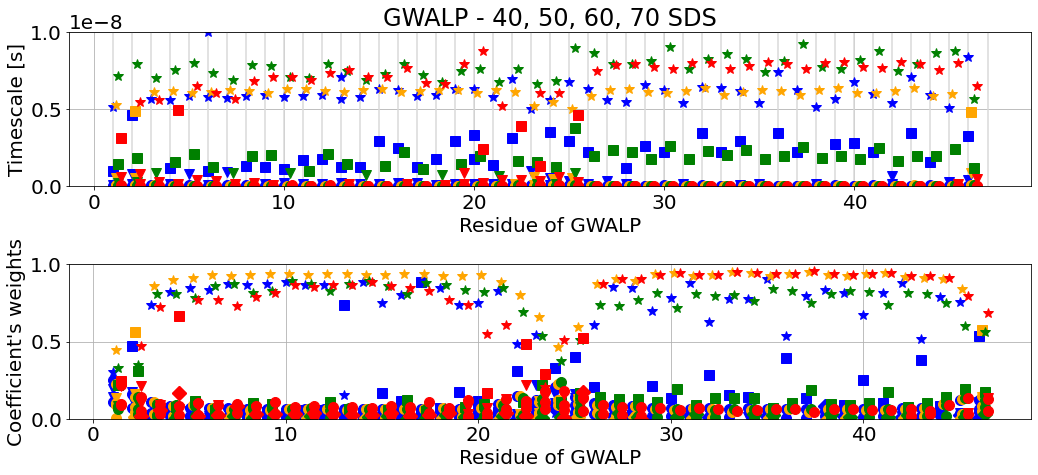

In [144]:
ylim=[0,10**(-9)*10.003]
ylim_weig=[0,1]
title="GWALP - 40, 50, 60, 70 SDS"
aminoAcidsReplicas=[aminoAcids40,aminoAcids50,aminoAcids60,aminoAcids70]
PlotTimescales_replicas(merge,groupTimes,title,xlabel,ylim,ylim_weig,*aminoAcidsReplicas)